# Data Processing and Analysis

In [2]:
import pandas as pd
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from data_processing import * 
from plots import *
from normalization import encoder, scaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Load Data

In [3]:
# Load Data
credit, ip, fraud = load_data()

2024-10-22 11:17:41,022 - INFO - Loading data from file...
2024-10-22 11:17:42,813 - INFO - Data loaded 


## Data Summary

In [4]:
credit.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
credit.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [4]:
ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [5]:
fraud.tail()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0
151111,138208,2015-06-10 07:02:20,2015-07-21 02:03:53,20,ZINIADFCLHYPG,Direct,IE,M,38,4.103825e+09,0


In [6]:
ip.describe(include='all')

,lower_bound_ip_address,upper_bound_ip_address,country
count,1.388460e+05,1.388460e+05,138846
unique,NaN,NaN,235
top,NaN,NaN,United States
freq,NaN,NaN,46868
mean,2.724532e+09,2.724557e+09,NaN
std,8.975215e+08,8.974979e+08,NaN
min,1.677722e+07,1.677747e+07,NaN
25%,1.919930e+09,1.920008e+09,NaN
50%,3.230887e+09,3.230888e+09,NaN
75%,3.350465e+09,3.350466e+09,NaN


In [7]:
fraud.describe(include='all')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
count,151112.000000,151112,151112,151112.000000,151112,151112,151112,151112,151112.000000,1.511120e+05,151112.000000
unique,NaN,151112,150679,NaN,137956,3,5,2,NaN,NaN,NaN
top,NaN,2015-02-24 22:55:49,2015-06-08 09:42:04,NaN,CQTUVBYIWWWBC,SEO,Chrome,M,NaN,NaN,NaN
freq,NaN,1,3,NaN,20,60615,61432,88293,NaN,NaN,NaN
mean,200171.040970,NaN,NaN,36.935372,NaN,NaN,NaN,NaN,33.140704,2.152145e+09,0.093646
std,115369.285024,NaN,NaN,18.322762,NaN,NaN,NaN,NaN,8.617733,1.248497e+09,0.291336
min,2.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,18.000000,5.209350e+04,0.000000
25%,100642.500000,NaN,NaN,22.000000,NaN,NaN,NaN,NaN,27.000000,1.085934e+09,0.000000
50%,199958.000000,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,33.000000,2.154770e+09,0.000000
75%,300054.000000,NaN,NaN,49.000000,NaN,NaN,NaN,NaN,39.000000,3.243258e+09,0.000000


## Duplicates 

In [6]:
credit.duplicated().sum()

1081

In [9]:
ip.duplicated().sum()

0

In [10]:
fraud.duplicated().sum()

0

- Remove duplicates from the credit data

In [7]:
credit.drop_duplicates(inplace=True)

## Missing Values and Data types

In [12]:
data_overview(credit)

2024-10-20 22:24:08,021 - INFO - Loading Data Overivew


The shape of our Data is (283726, 31)

Data Overview:


,Data Types,Number of missing values,Unique values
Class,int64,0,2
Amount,float64,0,32767
Time,float64,0,124592
V3,float64,0,275663
V28,float64,0,275663
V27,float64,0,275663
V26,float64,0,275663
V25,float64,0,275663
V24,float64,0,275663
V23,float64,0,275663


In [13]:
data_overview(ip)

2024-10-20 22:24:08,477 - INFO - Loading Data Overivew


The shape of our Data is (138846, 3)

Data Overview:


,Data Types,Number of missing values,Unique values
country,object,0,235
lower_bound_ip_address,float64,0,138846
upper_bound_ip_address,int64,0,138846


In [14]:
data_overview(fraud)

2024-10-20 22:24:08,518 - INFO - Loading Data Overivew


The shape of our Data is (151112, 11)

Data Overview:


,Data Types,Number of missing values,Unique values
sex,object,0,2
class,int64,0,2
source,object,0,3
browser,object,0,5
age,int64,0,58
purchase_value,int64,0,122
device_id,object,0,137956
ip_address,float64,0,143512
purchase_time,object,0,150679
user_id,int64,0,151112


In [8]:
fraud.purchase_time = pd.to_datetime(fraud.purchase_time)

fraud.signup_time = pd.to_datetime(fraud.signup_time)


Insights
- All datasets have no missing value

## EDA

### credit

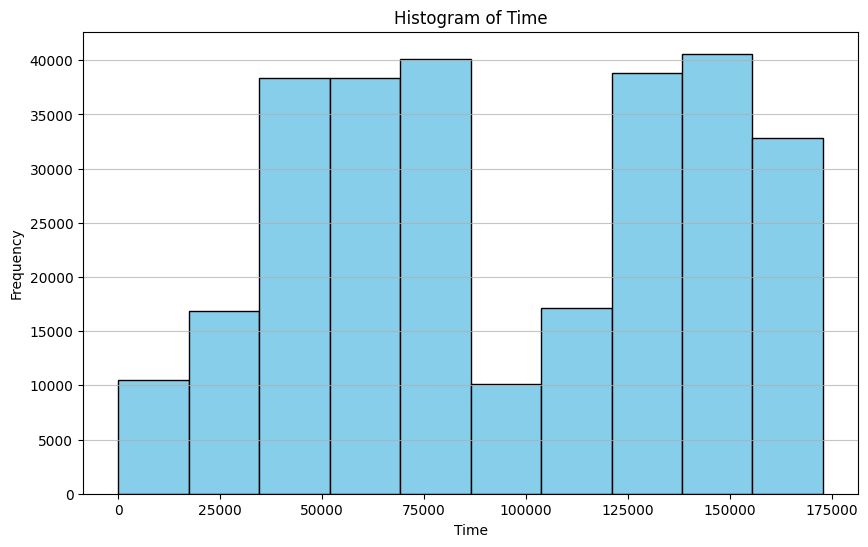

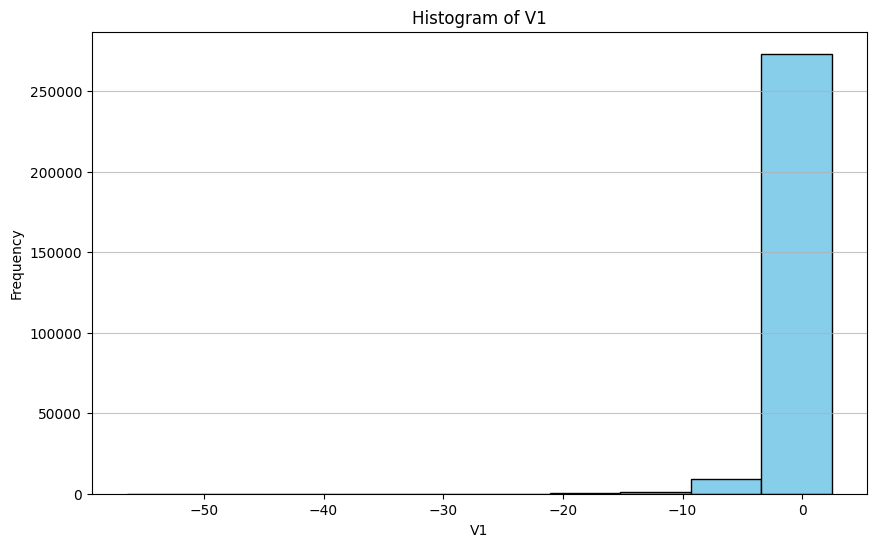

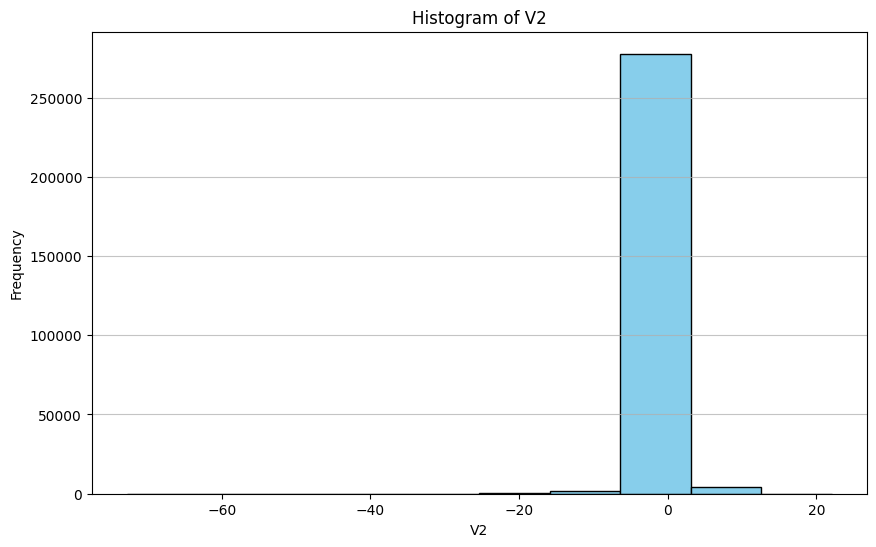

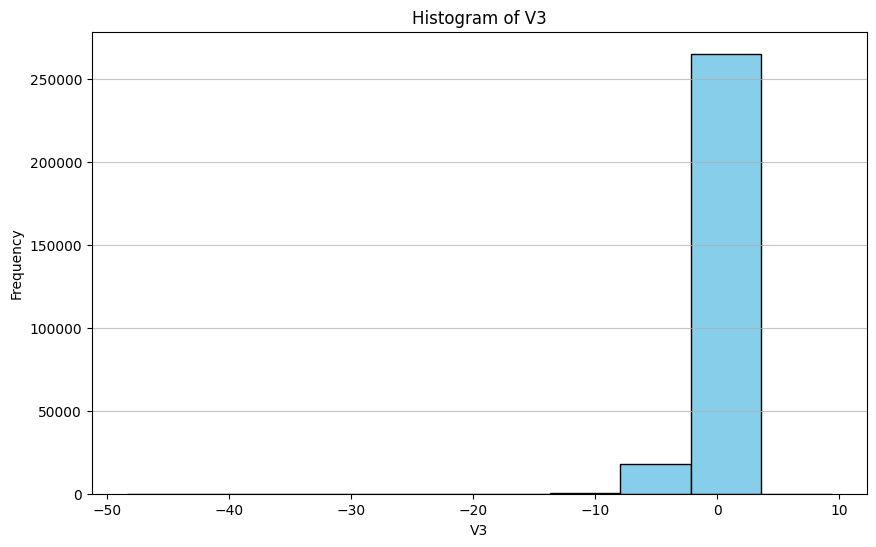

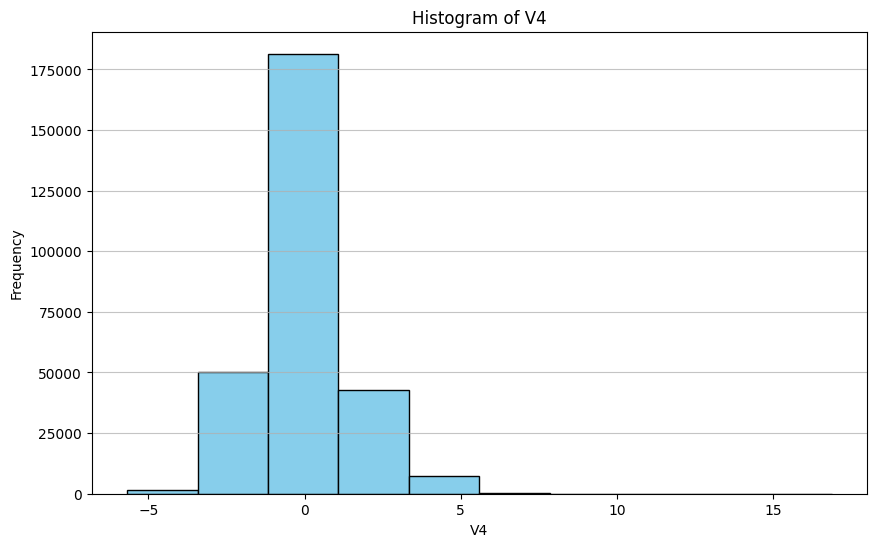

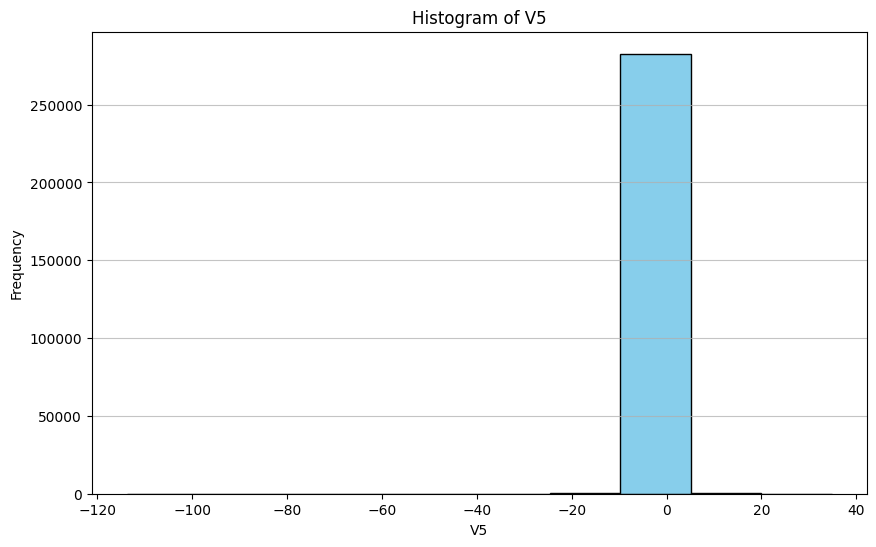

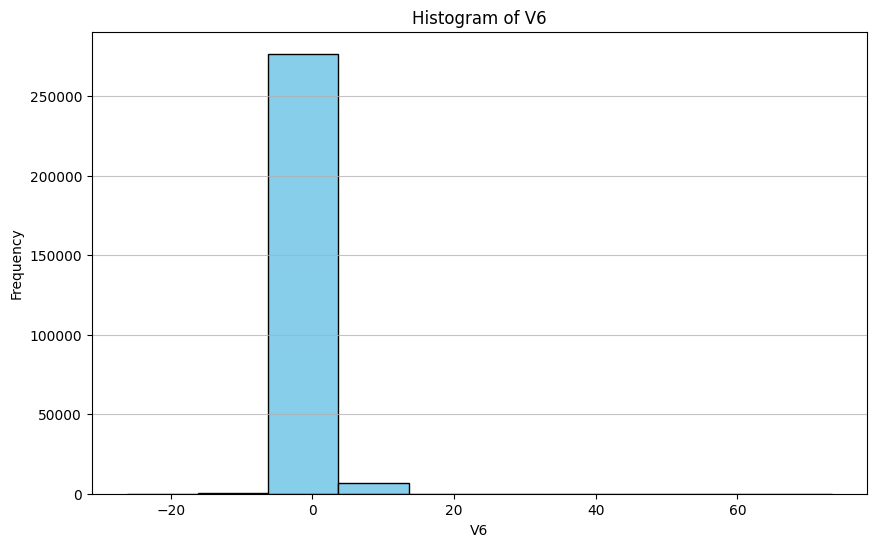

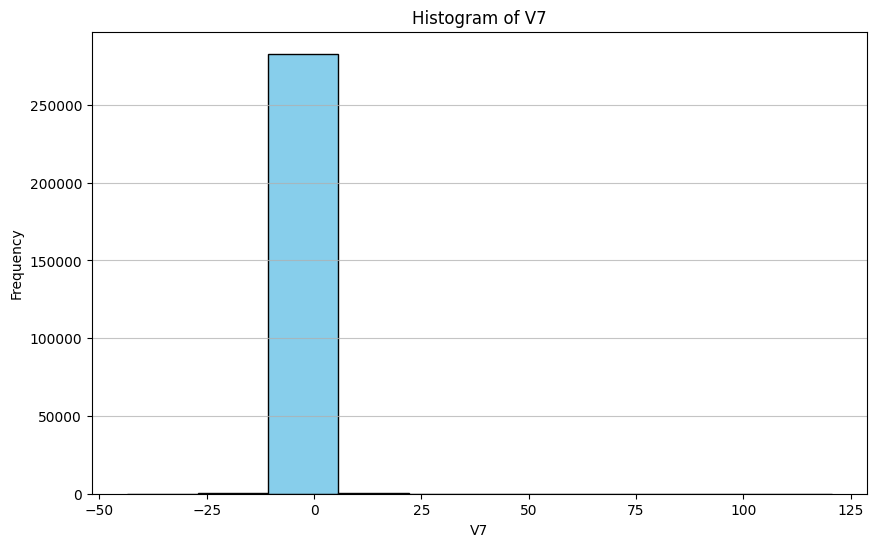

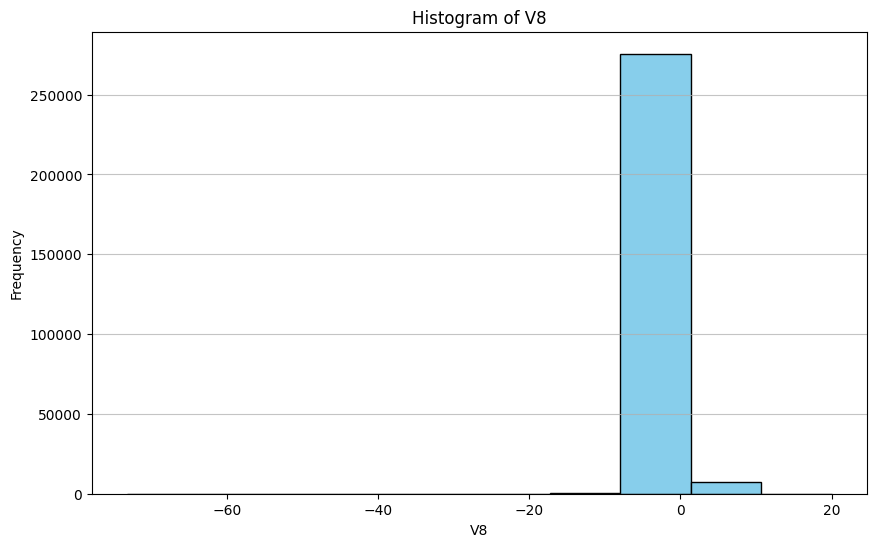

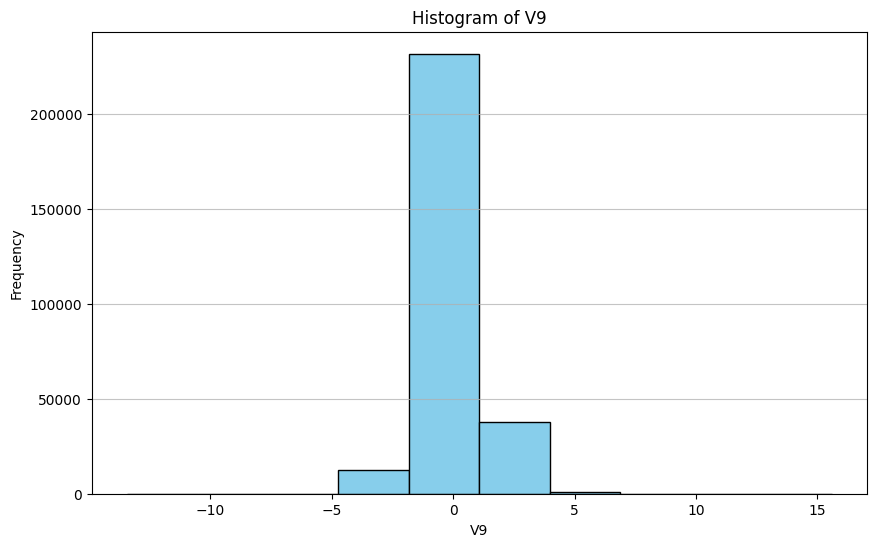

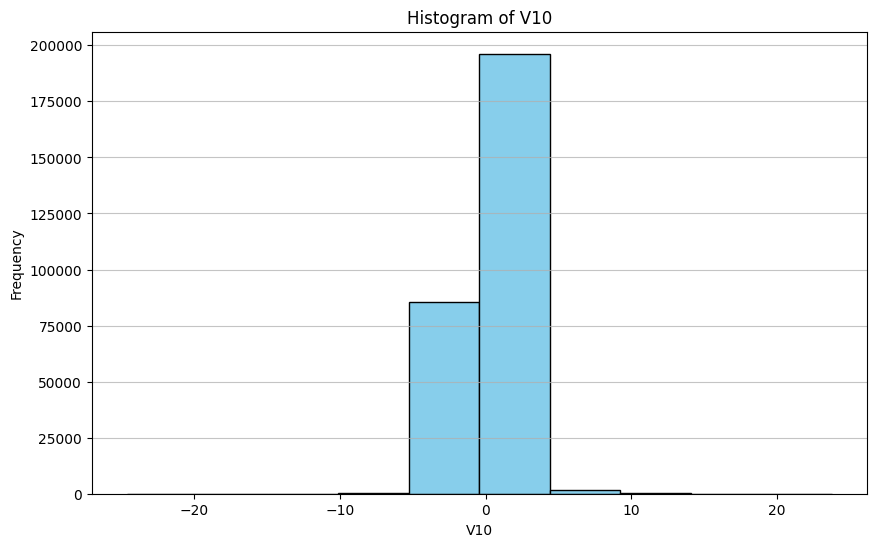

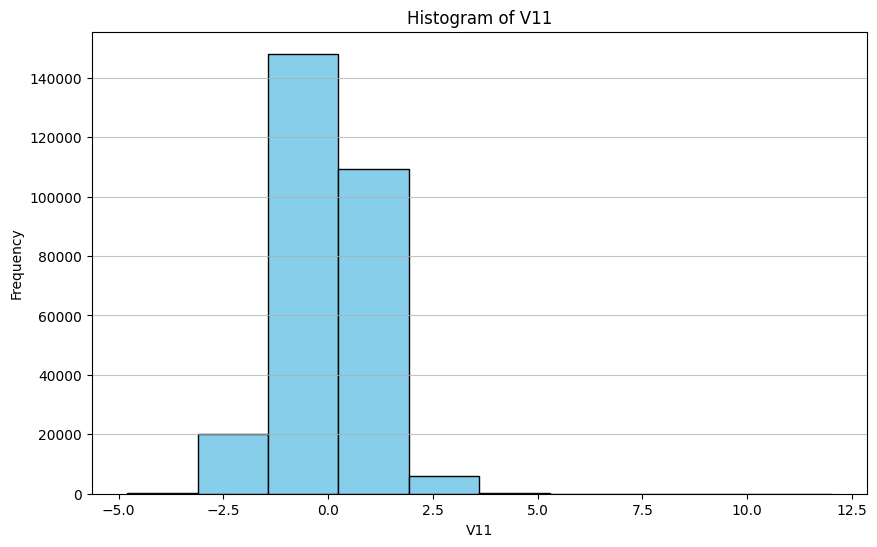

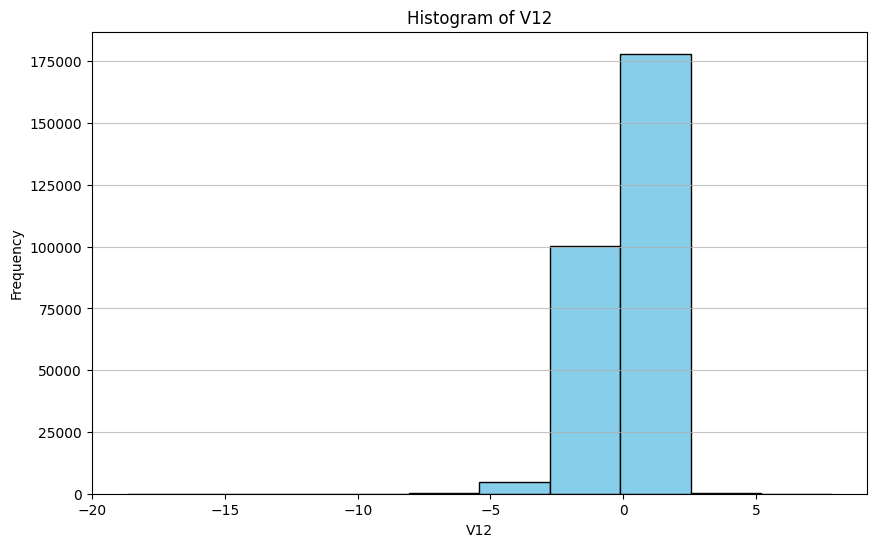

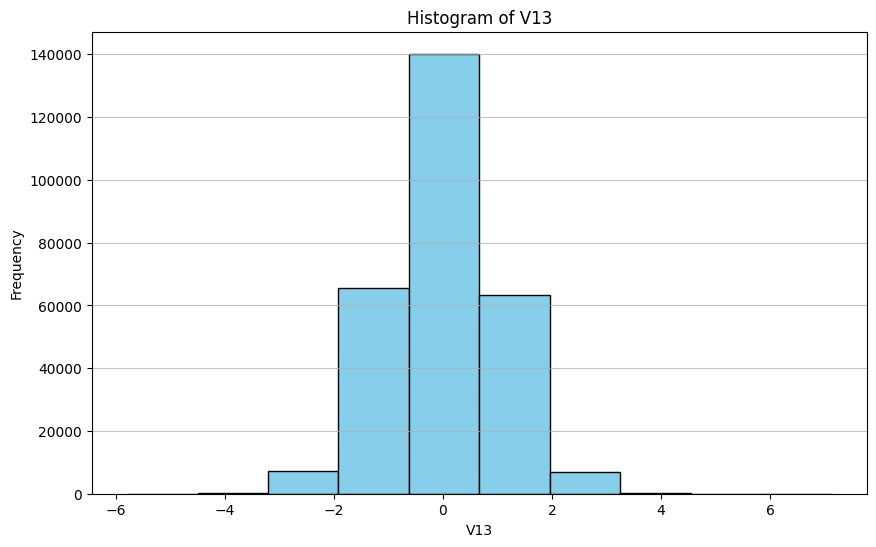

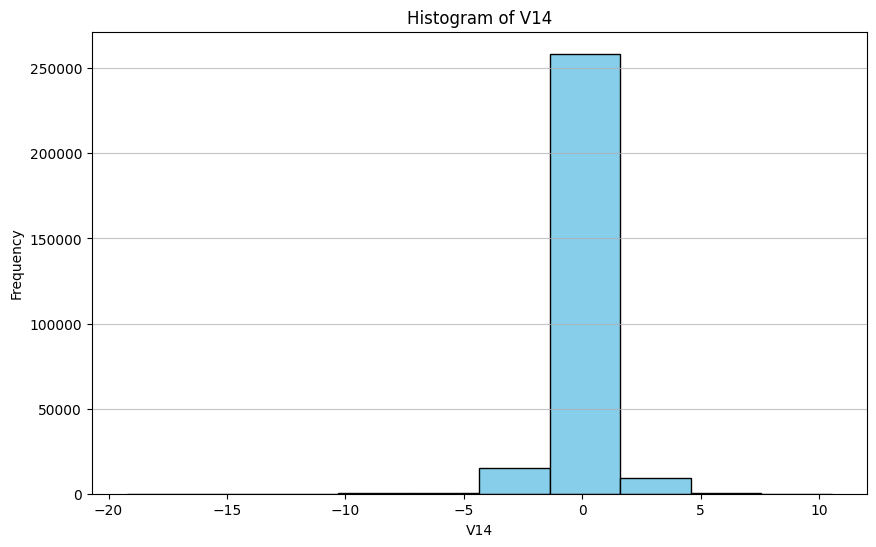

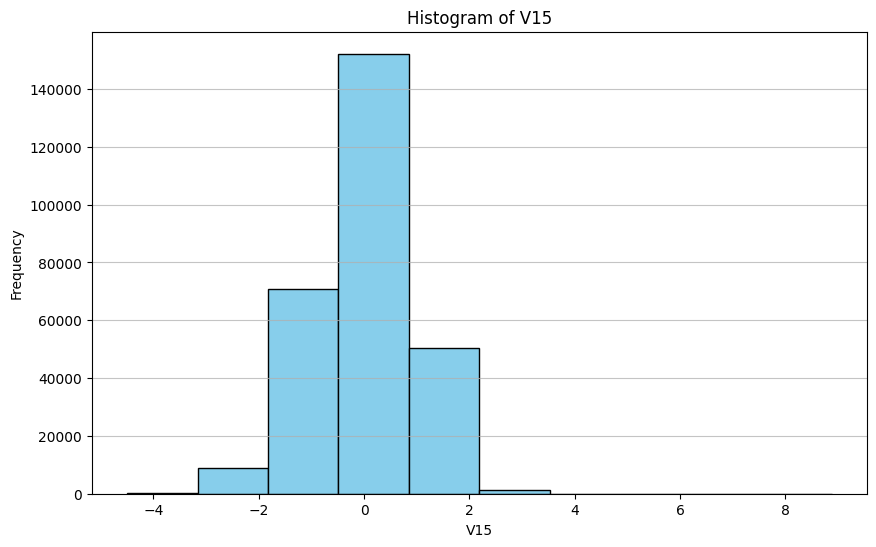

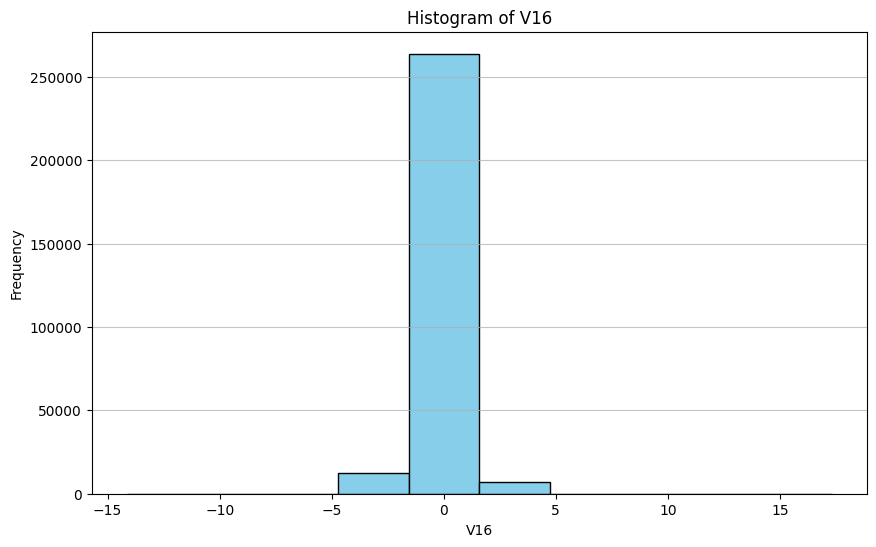

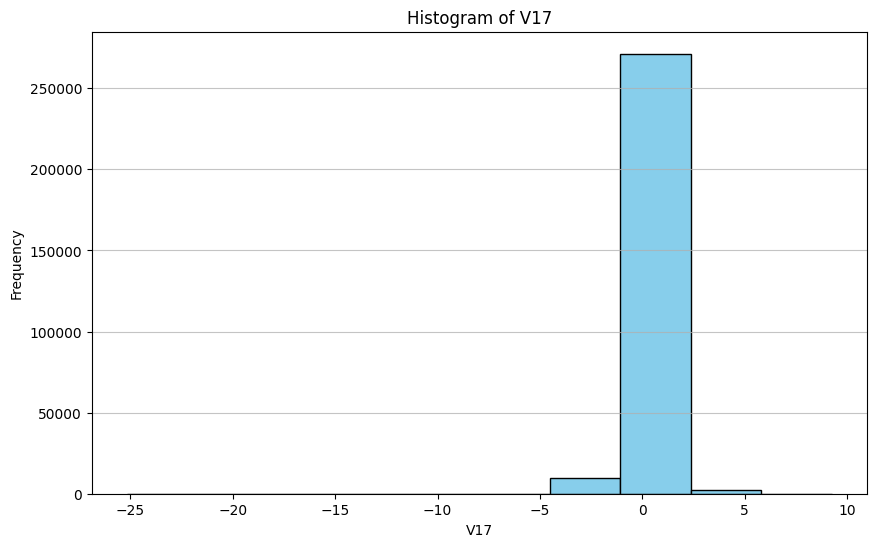

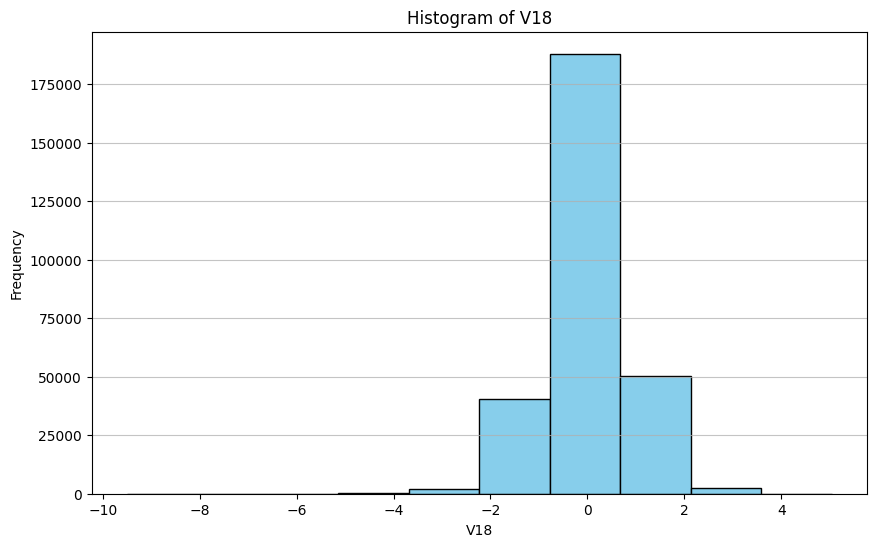

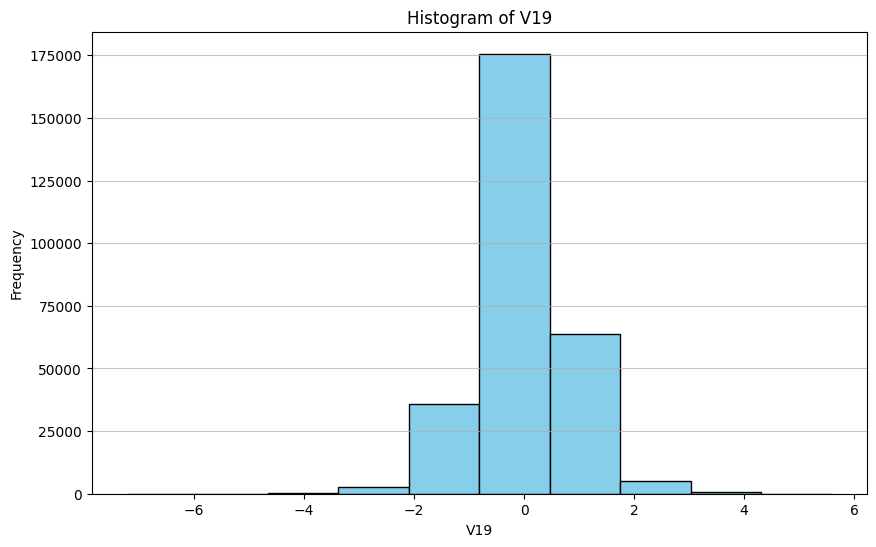

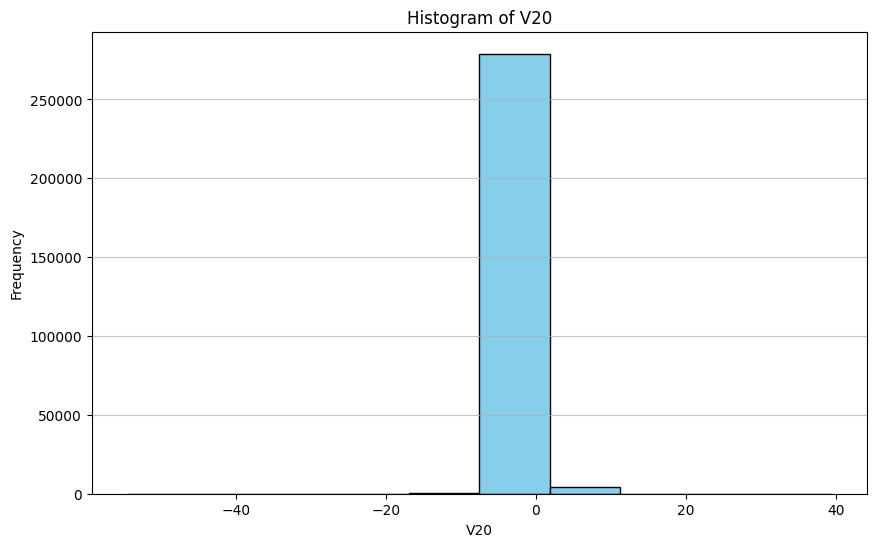

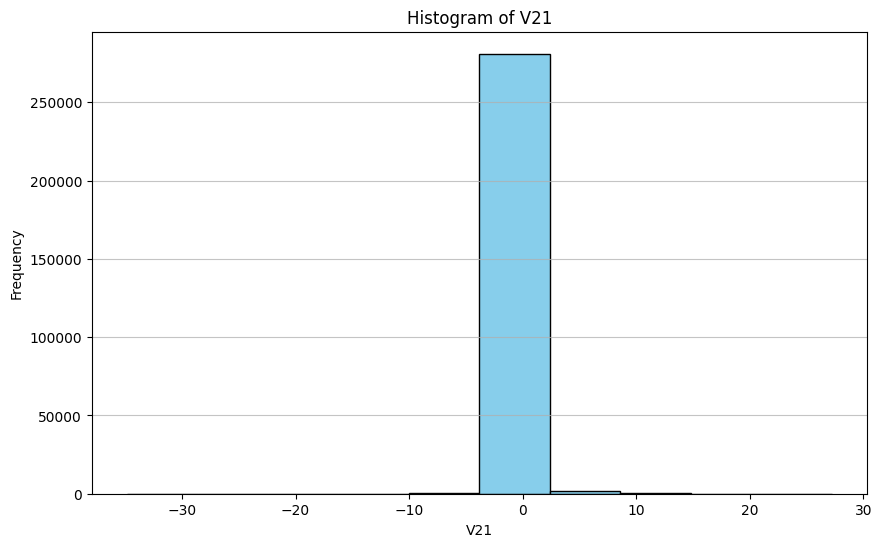

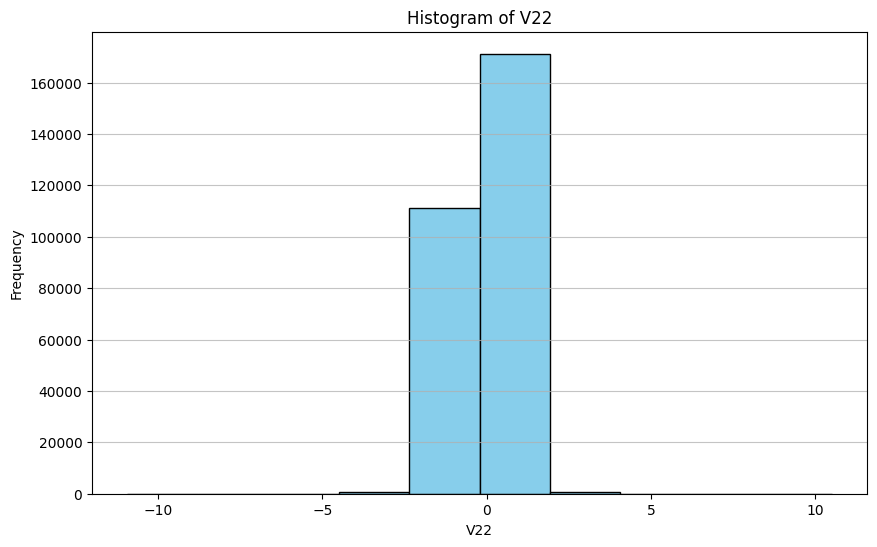

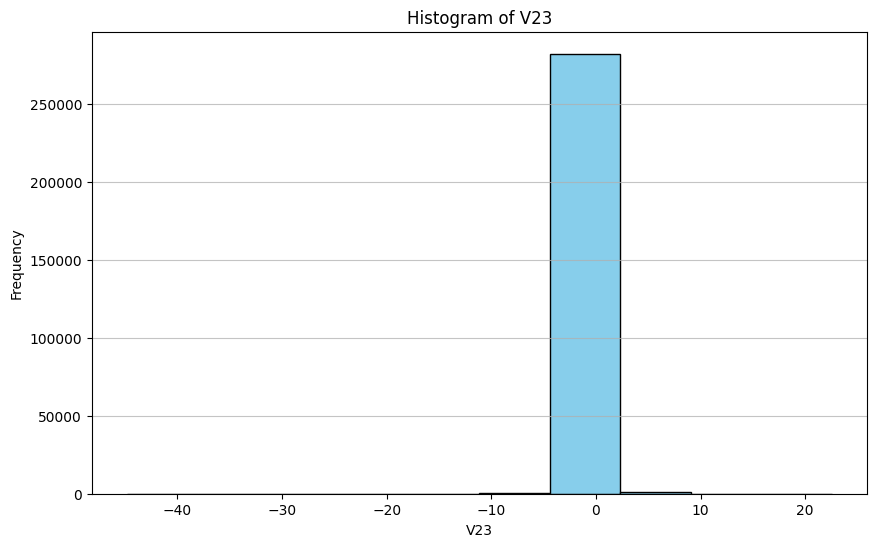

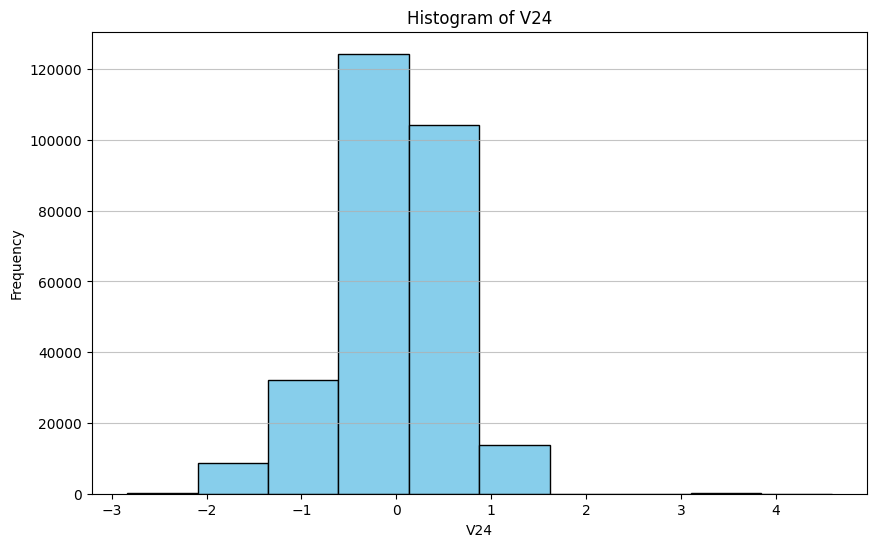

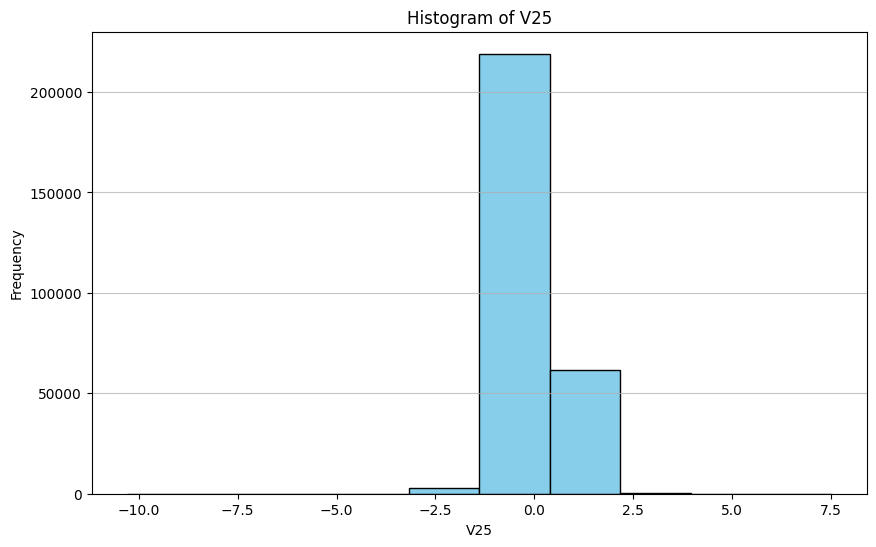

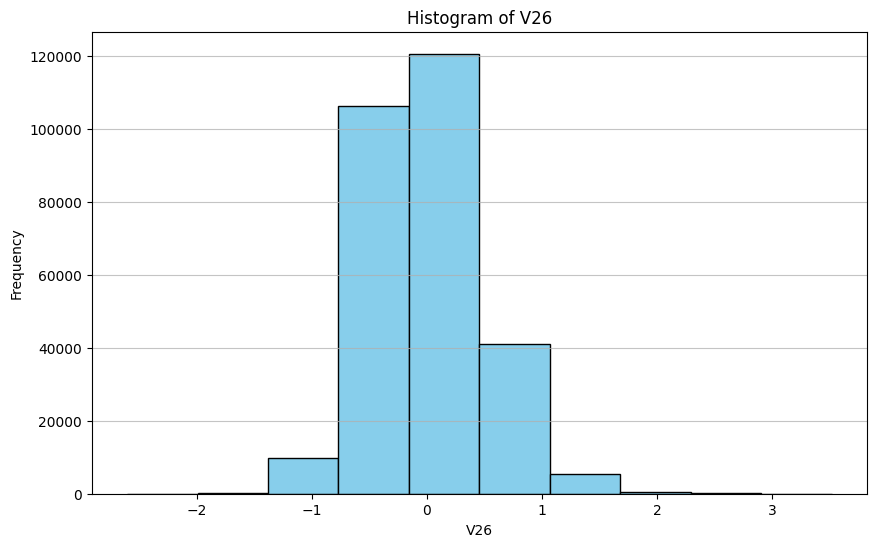

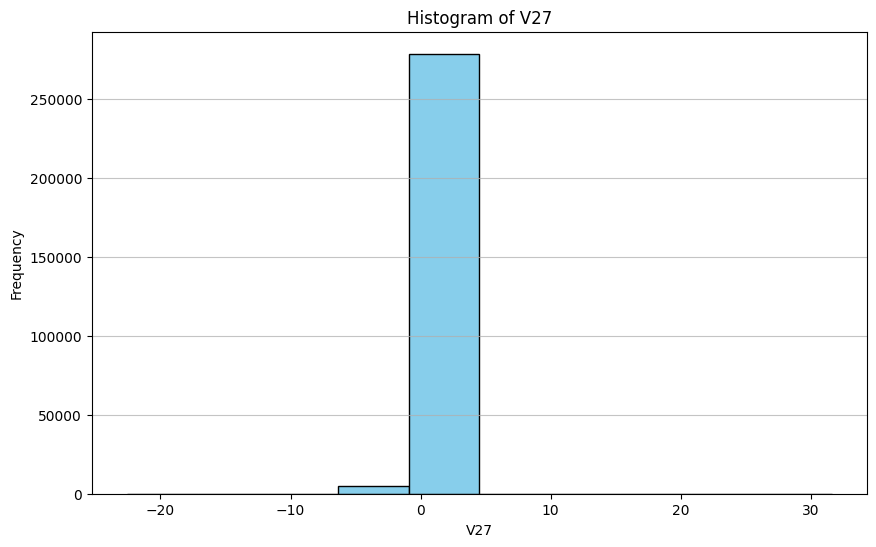

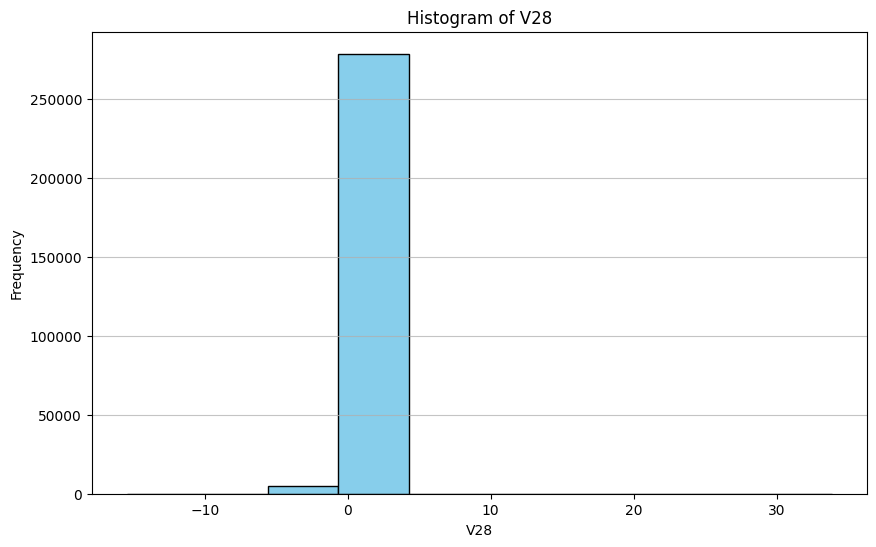

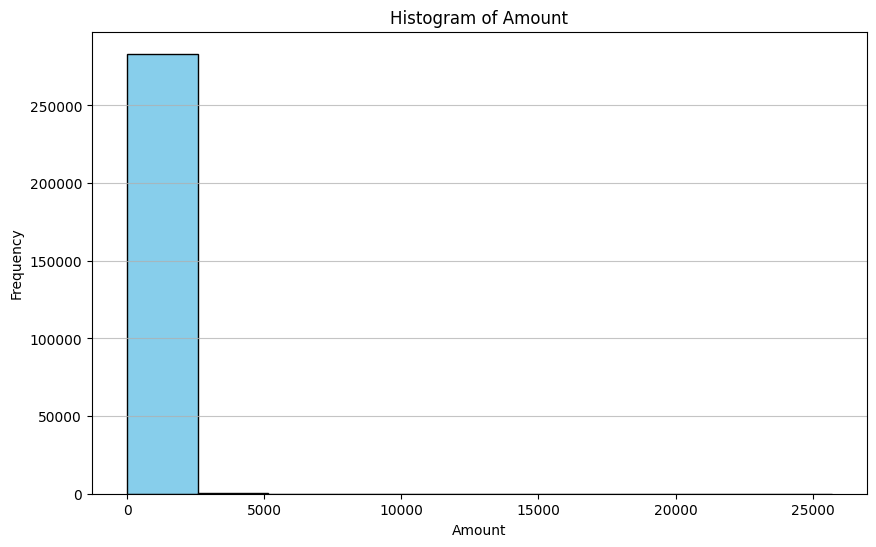

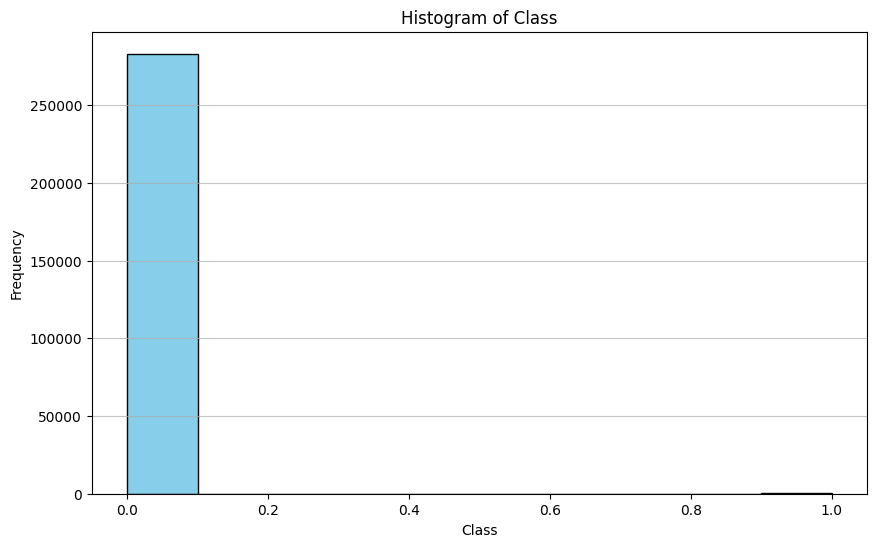

In [16]:
num_plot(credit)

In [52]:
def correlations(df):
    '''
        Correlation 
    '''
    # Calculate the correlation matrix
    correlation_matrix = df.corr()

    # Create a heatmap
    plt.figure(figsize=(18, 18))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

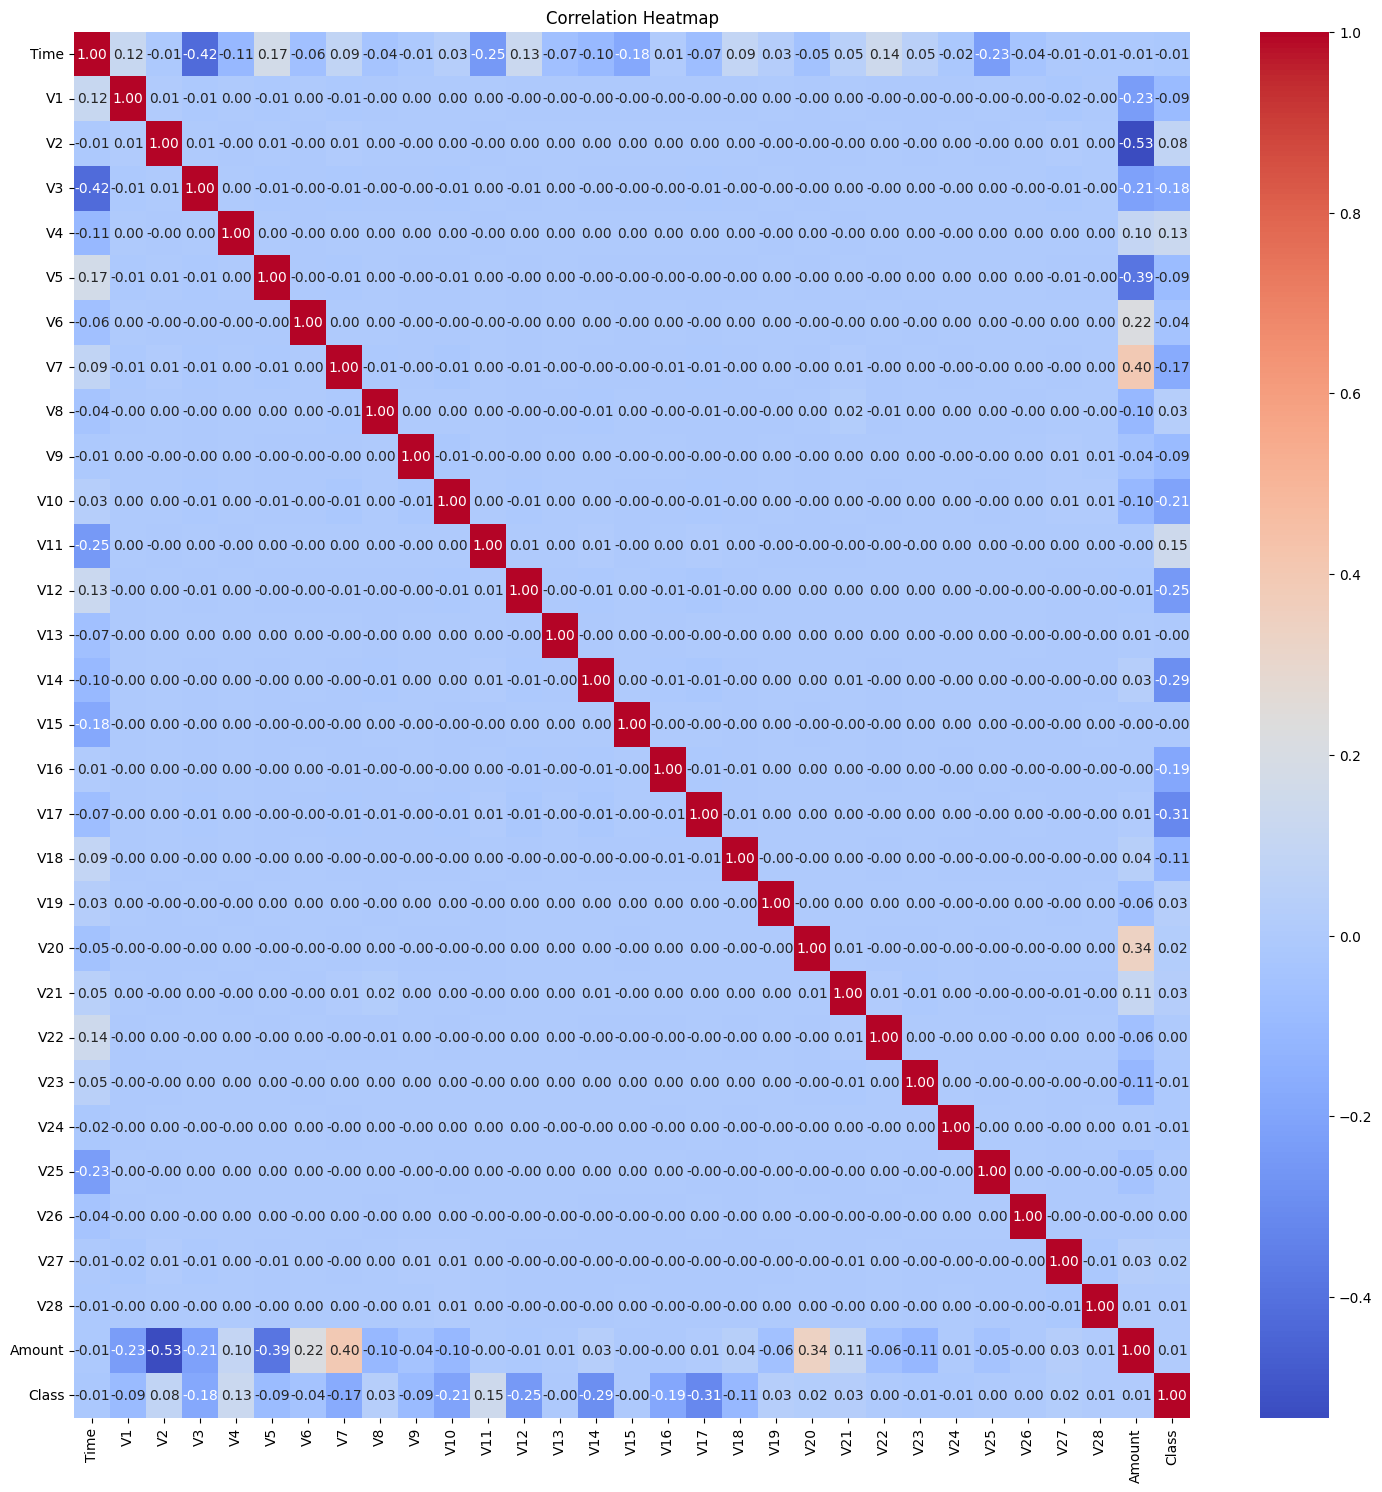

In [53]:
correlations(credit)

### ip

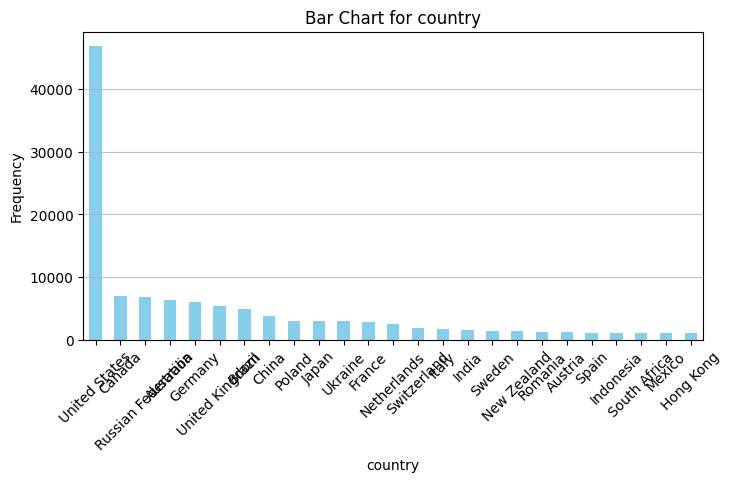

In [17]:
category_plot(ip)

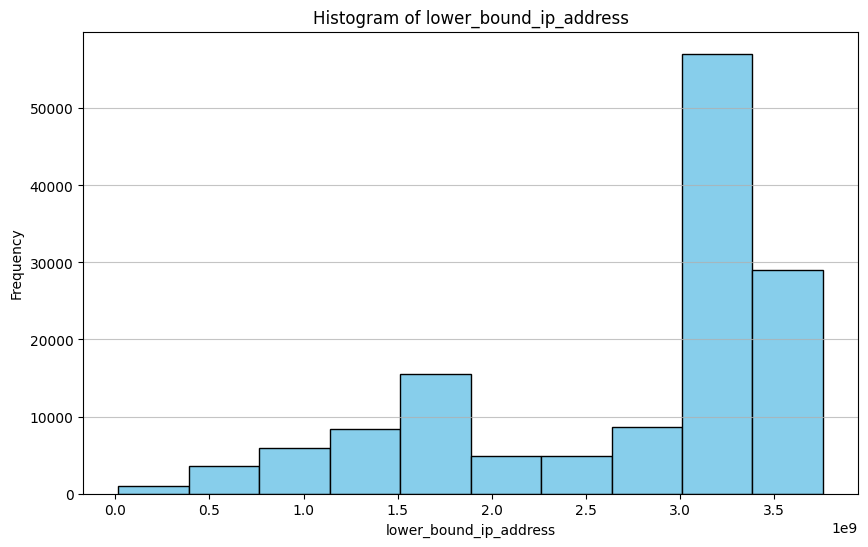

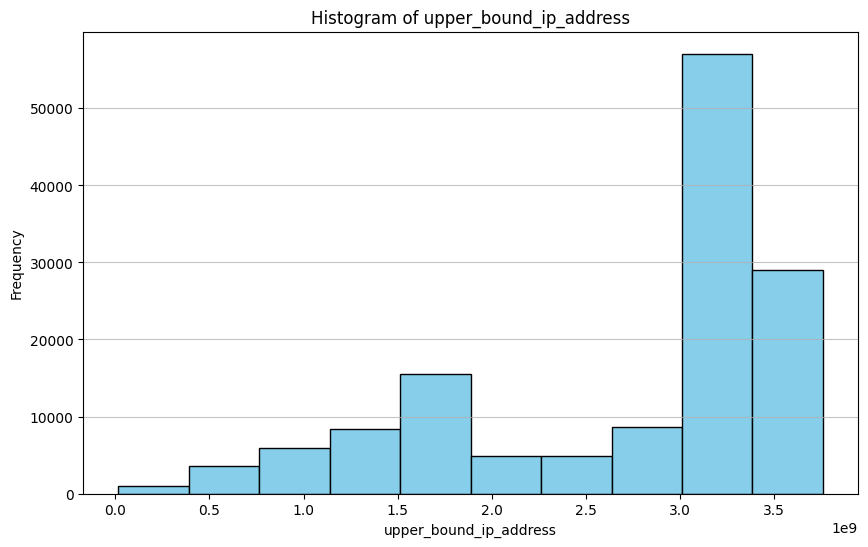

In [18]:
num_plot(ip)

### fraud 

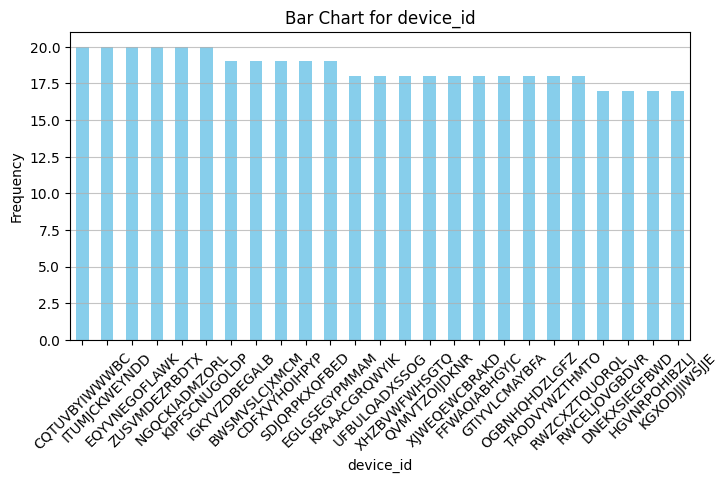

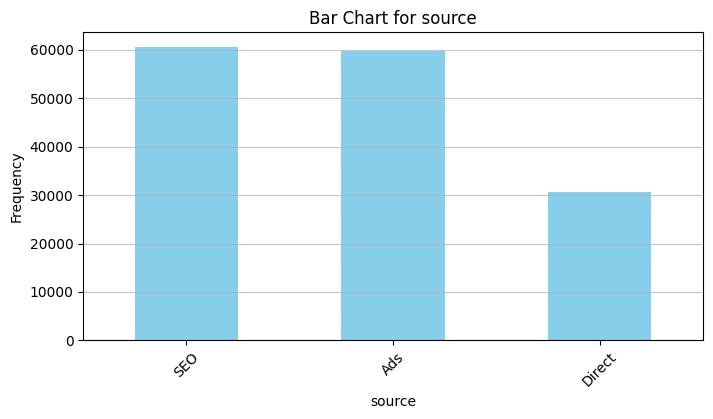

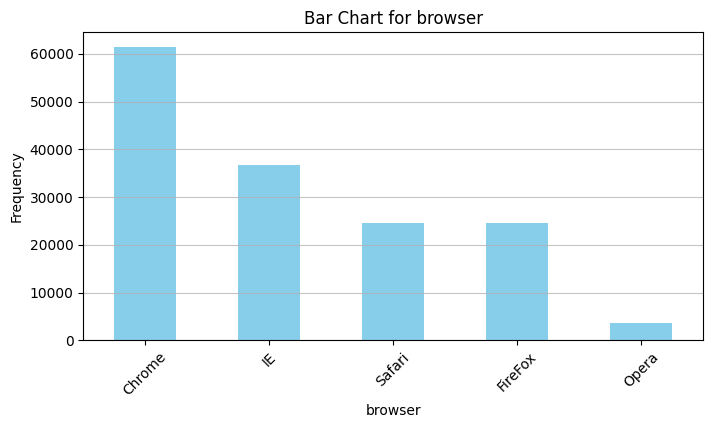

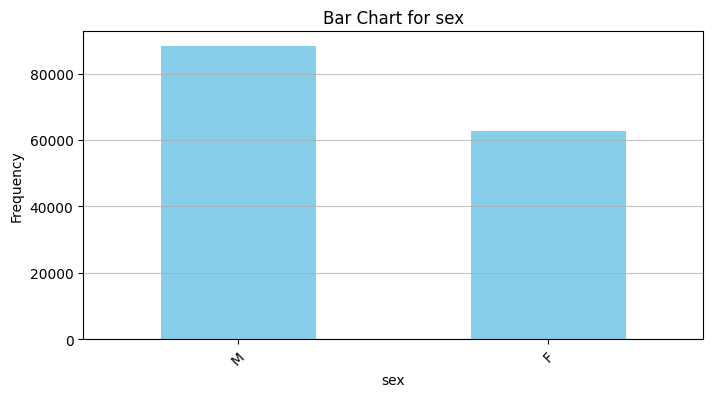

In [19]:
category_plot(fraud)

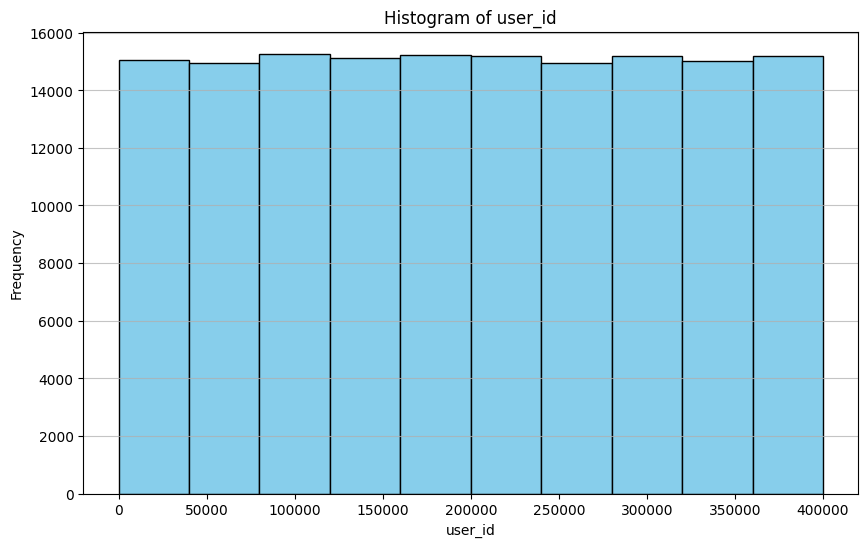

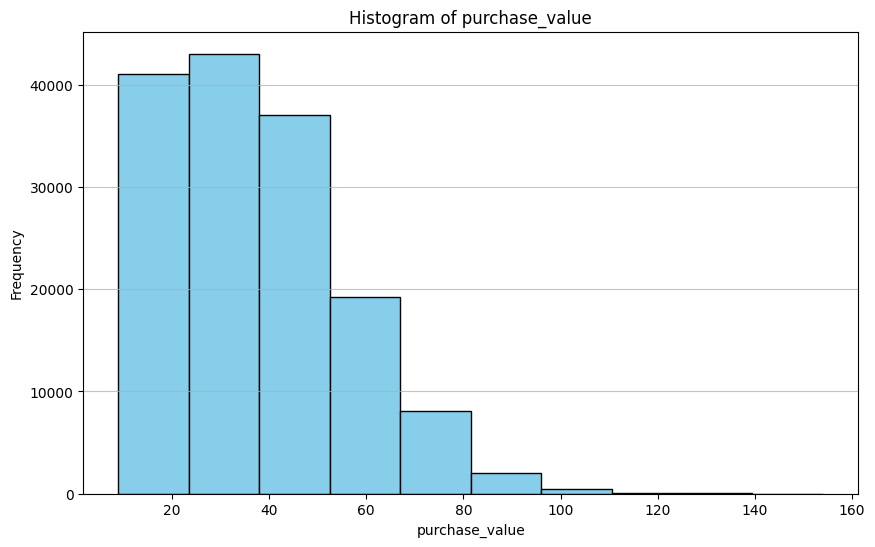

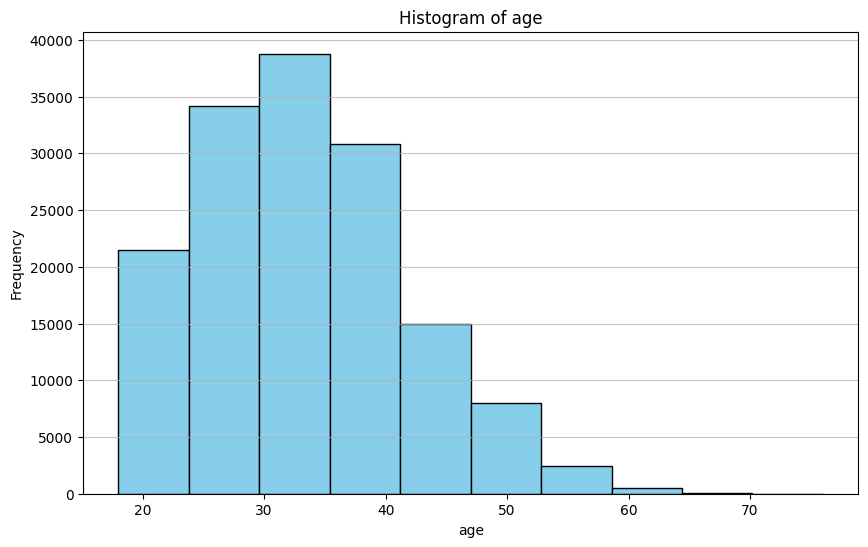

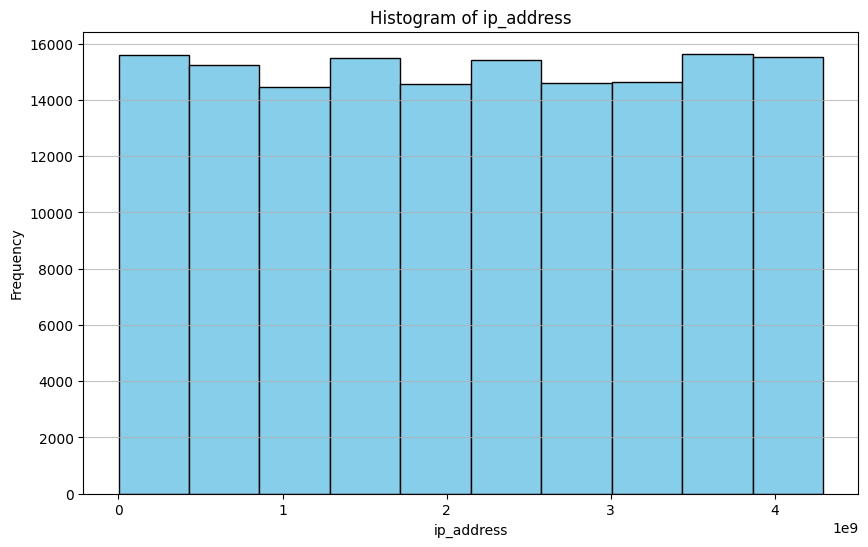

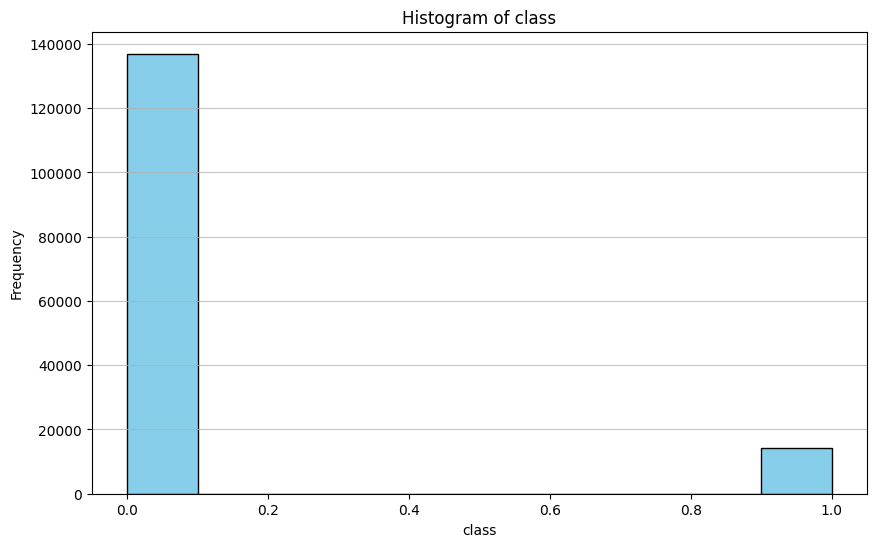

In [20]:
num_plot(fraud)

In [55]:
fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,hour,day
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,2,5
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,-2147483648,1,NA,18,3
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,-2147483648,0,NA,13,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,18,2


In [54]:
correlations(fraud)

ValueError: could not convert string to float: 'QVPSPJUOCKZAR'

## Merge datasets

In [21]:
df_fraud = merge_data(fraud, ip)

In [22]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,-2147483648,1,NA
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,-2147483648,0,NA
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States


## Feature Engineering 

In [25]:
data_overview(df_fraud)

2024-10-20 22:29:38,364 - INFO - Loading Data Overivew


The shape of our Data is (151112, 12)

Data Overview:


,Data Types,Number of missing values,Unique values
sex,object,0,2
class,int64,0,2
source,object,0,3
browser,object,0,5
age,int64,0,58
purchase_value,int64,0,122
country,object,0,142
ip_address,int32,0,71501
device_id,object,0,137956
purchase_time,datetime64[ns],0,150679


In [26]:
feature_eng(df_fraud)


In [27]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,hour,day,transaction_count,transaction_velocity
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,Japan,2,5,1,52 days 03:51:22
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,United States,1,0,1,0 days 04:59:04
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,-2147483648,1,NA,18,3,1,0 days 00:00:01
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,-2147483648,0,NA,13,0,1,5 days 16:41:25
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,United States,18,2,1,50 days 11:31:01


In [56]:
df_fraud.dtypes

user_id                           int64
signup_time              datetime64[ns]
purchase_time            datetime64[ns]
purchase_value                    int64
device_id                        object
source                           object
browser                          object
sex                              object
age                               int64
ip_address                        int32
class                             int64
country                          object
hour                              int32
day                               int32
transaction_count                 int64
transaction_velocity    timedelta64[ns]
dtype: object

## Encoding and scaling 

### Credit data scaled

In [28]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [19]:
credit_col = credit.columns[credit.columns != 'Class']

In [20]:
credit_scaled = scaler('standardScaler', credit, credit_col)

In [21]:
credit_scaled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-0.701082,-0.041687,1.680101,0.976623,-0.247020,0.348012,0.193700,0.084434,0.333534,0.085688,-0.541662,-0.620391,-0.996550,-0.327050,1.603615,-0.539734,0.246646,0.028990,0.497011,0.326273,-0.024777,0.383483,-0.177444,0.110157,0.247059,-0.392622,0.333033,-0.065850,0.244200,0
1,-1.996823,0.608792,0.164138,0.109279,0.318998,0.042258,-0.060980,-0.065656,0.072903,-0.231703,-0.153784,1.582896,1.071659,0.490735,-0.151252,0.693541,0.529653,-0.136468,-0.220781,-0.178907,-0.089963,-0.311372,-0.881454,0.162081,-0.561503,0.321175,0.260854,-0.027154,0.043219,-0.342584,0
2,-1.996802,-0.700336,-0.811337,1.174270,0.270648,-0.366756,1.352655,0.643223,0.210788,-1.381169,0.194242,0.612829,0.067156,0.719981,-0.174539,2.562950,-3.309216,1.317260,-0.146738,-2.780497,0.681564,0.343094,1.065068,1.457772,-1.138484,-0.628161,-0.288861,-0.144325,-0.183824,1.158900,0
3,-1.996802,-0.499064,-0.109972,1.187383,-0.608355,-0.008814,0.937245,0.192079,0.320843,-1.264664,-0.049713,-0.222524,0.179901,0.509483,-0.302638,-0.691296,-1.214165,-0.812176,2.345732,-1.515112,-0.270428,-0.149093,0.007299,-0.305465,-1.941446,1.242487,-0.460694,0.154039,0.185687,0.139886,0
4,-1.996781,-0.597606,0.535539,1.025470,0.287092,-0.297036,0.072873,0.481517,-0.228725,0.747917,0.700958,-0.807922,0.541797,1.351427,-1.176125,0.190272,-0.518043,-0.281545,-0.047422,0.988165,0.530343,-0.012516,1.101780,-0.220709,0.232904,-0.394800,1.041677,0.550001,0.654234,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.642235,-6.102103,6.118855,-6.519873,-1.459282,-3.897079,-1.956335,-4.007632,6.196662,1.749010,4.048299,-1.564031,2.727184,-0.693028,4.858879,-1.011596,1.266436,2.363807,0.607991,-0.839285,1.916461,0.295375,0.154412,1.626230,-0.841382,2.757072,0.518377,2.380049,2.509507,-0.350252,0
284803,1.642257,-0.379208,-0.030938,1.347812,-0.520175,0.629193,0.795504,0.018351,0.250814,0.535282,-0.905314,-0.147627,0.921425,1.219729,-0.709290,1.272159,-0.815982,-0.030698,-1.460149,-1.899847,0.077182,0.296413,1.275826,0.019665,-1.678330,-1.163409,-0.820253,0.168567,-0.164849,-0.254325,0
284804,1.642278,0.982354,-0.180433,-2.155033,-0.392355,1.908988,2.276699,-0.243249,0.601561,0.396215,-0.449033,0.403853,0.064176,-0.185149,-0.536491,1.451800,0.159729,0.371904,0.470681,-0.709373,0.001570,0.321057,0.798074,-0.060444,1.056626,0.510299,-0.181557,0.006802,-0.082640,-0.082239,0
284805,1.642278,-0.126465,0.324660,0.464577,0.489870,-0.275808,0.469130,-0.560399,0.576734,0.359367,-0.369456,-1.898514,-0.967325,-1.047474,0.471924,2.143991,-0.697886,0.605050,1.328514,3.563062,0.165259,0.366919,1.104223,-0.262138,0.203081,-1.091530,1.133734,0.270523,0.317004,-0.313391,0


### Fraud data scaled

In [43]:
categorical_feature = [ 'source', 'browser', 'sex', 'country', ]

num_cat = [ 'purchase_value', 'age',  'hour', 'day', 'transaction_count']

all_feature = categorical_feature + num_cat
df_feat = df_fraud[all_feature]

In [45]:
df_label  = encoder('labelEncoder', df_feat, categorical_feature)

In [46]:
df_fraud_scaled = scaler('standardScaler', df_label, num_cat)

In [47]:
df_fraud_scaled

,source,browser,sex,country,purchase_value,age,hour,day,transaction_count
0,2,0,1,61,-0.160204,0.679914,-1.377455,0.991020,0.0
1,0,0,0,137,-1.142592,2.304476,-1.522122,-1.501259,0.0
2,2,3,1,89,-1.197169,2.304476,0.937208,-0.005891,0.0
3,2,4,1,89,0.385567,0.911994,0.213876,-1.501259,0.0
4,0,4,1,137,0.112681,1.376155,0.937208,-0.504347,0.0
...,...,...,...,...,...,...,...,...,...
151107,2,0,1,89,0.330990,-0.596528,-1.666788,1.489476,0.0
151108,2,4,1,89,-0.105627,-0.132367,0.069209,-1.002803,0.0
151109,2,2,0,89,0.167258,-0.828608,-0.654123,-0.504347,0.0
151110,2,0,1,89,0.494721,0.447833,-0.364790,-1.501259,0.0


# Modeling

In [74]:
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import joblib

In [22]:
def split_data(X, y, test_size=0.2, random_state=42):
    return train_test_split(X, y, test_size=test_size, random_state=random_state)


In [178]:
# Split the data
X = credit_scaled.drop('Class', axis=1)
y = credit_scaled['Class']
X_train, X_test, y_train, y_test = split_data(X, y)

### Handling imbalance data

In [42]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

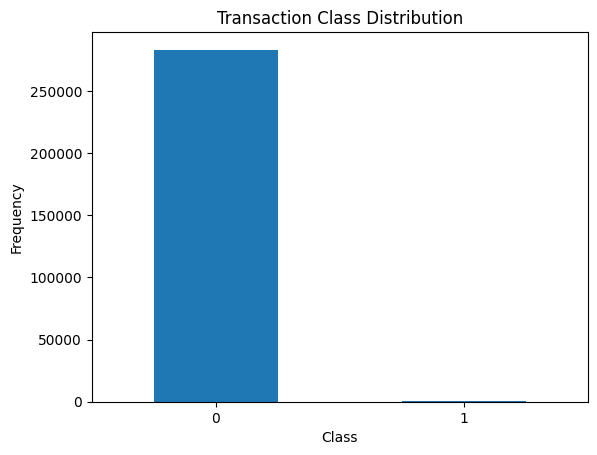

In [44]:
count_classes = pd.value_counts(credit['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

In [ ]:
from collections import Counter
from imblearn.under_sampling import NearMiss
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

In [37]:
def resample(x_train, y_train, name):
    smote = SMOTE(random_state = 42)
    X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
    joblib.dump(smote, f'../models/smote_{name}.pkl')
    return X_train_resample, y_train_resample


In [38]:
X_train_resample, y_train_resample = resample(X_train, y_train,'credit')

In [47]:
y_train_resample.value_counts()

Class
0    226597
1    226597
Name: count, dtype: int64

In [41]:
X_train.shape

(226980, 30)

In [40]:
X_train_resample.shape

(453194, 30)

In [57]:
train_resample = pd.concat([X_train_resample, y_train_resample], axis=1)

In [58]:
train_resample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.777956,-0.698047,-0.653974,1.183800,-1.273024,-0.172150,1.635550,0.825141,0.466885,0.576456,-1.381754,1.549920,1.216509,-0.432560,-0.641889,-1.237808,-0.742019,0.416357,-2.466842,-2.912129,0.545361,0.252643,0.506614,1.290410,-1.621762,-1.502553,1.877590,-0.451386,-0.285430,0.916646,0
1,1.415597,-0.033805,0.356264,-0.908948,-0.775999,2.691187,2.551075,0.991206,0.459734,-0.462247,-0.388131,-0.430936,-0.143197,-0.662268,0.396528,-0.946200,-0.682985,-0.815918,-0.755216,-1.252450,-0.134829,0.096678,0.430035,-0.431464,1.140095,0.889222,-1.323639,-0.311355,-0.600746,-0.220259,0
2,-1.128033,-0.188951,0.436813,1.180927,0.165335,-0.175981,-0.381022,0.478929,-0.010934,-0.042448,-0.619584,-0.825072,0.094988,-0.240238,-0.201074,-0.369993,-0.323922,0.027416,-0.632634,0.473311,-0.047169,-0.293165,-0.711280,-0.072232,0.635898,-0.242757,0.289884,0.073905,0.175078,-0.273494,0
3,0.555800,-0.193478,0.273358,-0.486273,-0.767455,1.305258,-0.837946,1.222781,-0.468620,-0.218514,-0.154196,0.956454,0.460527,-0.607955,0.754146,-0.524298,-0.856141,-0.819060,0.205596,0.269332,-0.303569,0.363871,1.294425,-0.318514,1.201796,0.391508,-1.084803,-0.954858,-0.316898,-0.328167,0
4,0.621195,0.354065,0.110137,0.318027,-0.237513,-0.090512,0.056738,-0.416081,-0.657193,0.898623,-0.609823,-1.050891,0.806469,0.905695,-0.355890,0.088004,0.264150,-0.848387,0.180500,-0.795304,-0.358642,1.322094,0.646084,-0.314260,1.170857,0.936544,-0.511015,0.493020,0.600270,-0.313431,0


In [59]:
train_resample.Class.value_counts()

Class
0    226597
1    226597
Name: count, dtype: int64

### linear regression

In [32]:
# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_resample, y_train_resample)

LinearRegression()

In [79]:
y_pred = linear_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

In [80]:
accuracy = accuracy_score(y_test, y_pred)

print('test accuracy', accuracy)
print('classification report:\n',classification_report(y_test, y_pred) )

test accuracy 0.986448384027068
classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56656
           1       0.09      0.79      0.16        90

    accuracy                           0.99     56746
   macro avg       0.54      0.89      0.57     56746
weighted avg       1.00      0.99      0.99     56746



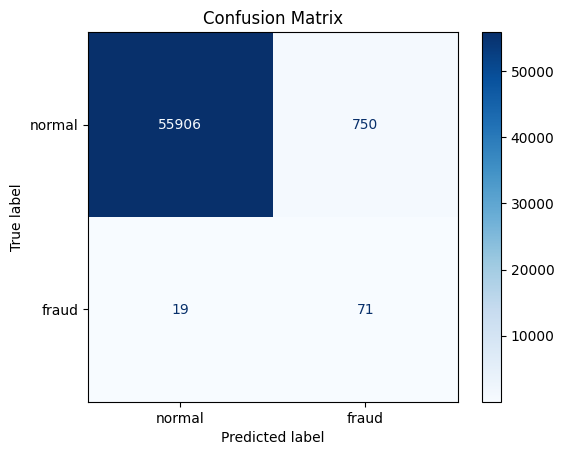

array([[55906,   750],
       [   19,    71]], dtype=int64)

In [81]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'fraud'])
disp.plot(cmap=plt.cm.Blues)  # You can choose a color map
plt.title("Confusion Matrix")
plt.show()

cm

In [88]:
import pickle
from datetime import datetime


def save_model(model):
    # Serialize the model with time stamp
    
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_filename = f"../models/{model}_{timestamp}.pkl"

    # Save the model to a pickle file
    with open(model_filename, "wb") as file:
        pickle.dump(linear_model, file)
    print(f"Model saved as {model_filename}")

save_model('linear_model')

Model saved as ../models/linear_model_20241022_194341.pkl


### Decision tree

In [87]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_resample, y_train_resample)

DecisionTreeClassifier(random_state=42)

In [71]:
y_pred = dt_model2.predict(X_test)
# y_pred = (y_pred > 0.5).astype(int)

In [55]:
accuracy = accuracy_score(y_test, y_pred)

print('test accuracy', accuracy)
print('classification report:\n',classification_report(y_test, y_pred) )

test accuracy 0.9975504881401333
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.36      0.73      0.49        90

    accuracy                           1.00     56746
   macro avg       0.68      0.87      0.74     56746
weighted avg       1.00      1.00      1.00     56746



In [72]:
accuracy = accuracy_score(y_test, y_pred)

print('test accuracy', accuracy)
print('classification report:\n',classification_report(y_test, y_pred) )

test accuracy 0.9975504881401333
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.36      0.73      0.49        90

    accuracy                           1.00     56746
   macro avg       0.68      0.87      0.74     56746
weighted avg       1.00      1.00      1.00     56746



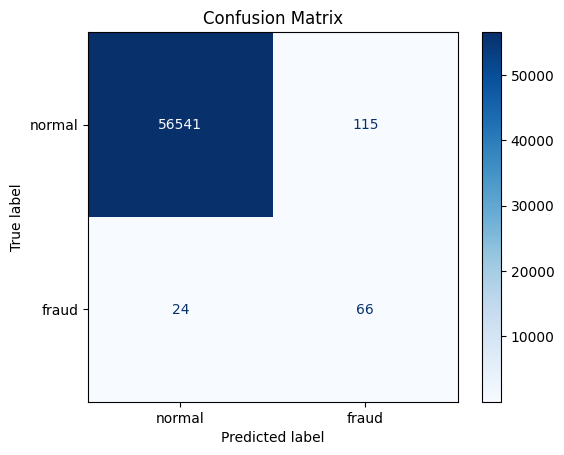

array([[56541,   115],
       [   24,    66]], dtype=int64)

In [68]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'fraud'])
disp.plot(cmap=plt.cm.Blues)  # You can choose a color map
plt.title("Confusion Matrix")
plt.show()

cm

In [ ]:
# Serialize the model with time stamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f"../models/model_{timestamp}_dt.pkl"

# Save the model to a pickle file
with open(model_filename, "wb") as file:
    pickle.dump(linear_model, file)
print(f"Model saved as {model_filename}")

### random forest

In [ ]:
import logging
logging.info('start random forest model') 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, verbose=2)
rf_model.fit(X_train_resample, y_train_resample)
logging.info('end of  random forest model') 


In [106]:
y_pred_rt = rf_model.predict(X_test)
accuracy_rt = accuracy_score(y_test, y_pred_rt)

print('test accuracy', accuracy_rt)
print('classification report of random forest:\n',classification_report(y_test, y_pred_rt) )



[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.2s


test accuracy 0.9995418179254926
classification report of random forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.92      0.78      0.84        90

    accuracy                           1.00     56746
   macro avg       0.96      0.89      0.92     56746
weighted avg       1.00      1.00      1.00     56746



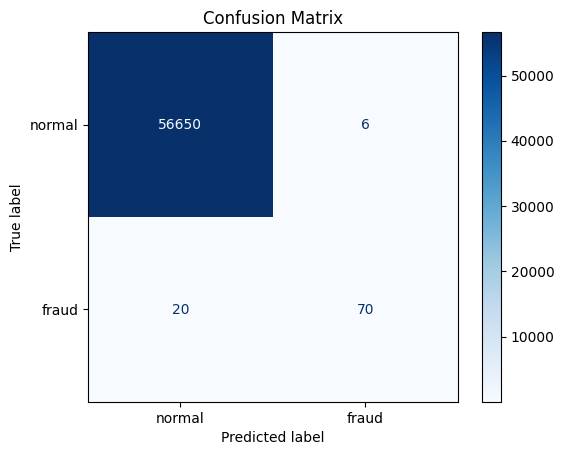

array([[56650,     6],
       [   20,    70]], dtype=int64)

In [107]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_rt)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'fraud'])
disp.plot(cmap=plt.cm.Blues)  # You can choose a color map
plt.title("Confusion Matrix")
plt.show()

cm

### Deep Learning

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LSTM
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf

In [91]:
#Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(X_train_resample, y_train_resample,test_size=0.1,random_state=42)

In [118]:
model = Sequential()
model.add(Dense(100,input_dim = 30,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(50,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation = "sigmoid"))

In [119]:
#Configure the model
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss="binary_crossentropy",
              metrics=  ['recall']
            )

In [155]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('recall')>0.999):
      print("\nReached 99.9% recall so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [102]:
#Train the model
model.fit(x_train.values,y_train.values, 
          validation_data=(x_val,y_val),
          epochs=10,
          batch_size=64,
          verbose=2,
          callbacks=callbacks)

Epoch 1/10
6374/6374 - 8s - 1ms/step - loss: 0.0455 - recall: 0.9845 - val_loss: 0.0357 - val_recall: 0.9937
Epoch 2/10
6374/6374 - 7s - 1ms/step - loss: 0.0354 - recall: 0.9924 - val_loss: 0.0280 - val_recall: 0.9983
Epoch 3/10
6374/6374 - 7s - 1ms/step - loss: 0.0291 - recall: 0.9962 - val_loss: 0.0233 - val_recall: 0.9994
Epoch 4/10
6374/6374 - 7s - 1ms/step - loss: 0.0246 - recall: 0.9980 - val_loss: 0.0200 - val_recall: 1.0000
Epoch 5/10
6374/6374 - 7s - 1ms/step - loss: 0.0224 - recall: 0.9985 - val_loss: 0.0177 - val_recall: 1.0000
Epoch 6/10
6374/6374 - 7s - 1ms/step - loss: 0.0203 - recall: 0.9989 - val_loss: 0.0159 - val_recall: 1.0000
Epoch 7/10

Reached 99.9% recall so cancelling training!
6374/6374 - 8s - 1ms/step - loss: 0.0185 - recall: 0.9991 - val_loss: 0.0145 - val_recall: 1.0000


In [104]:
y_pred_dnn = model.predict(X_test)
y_pred_dnn = (y_pred_dnn > 0.5).astype(int)
accuracy_dnn = accuracy_score(y_test, y_pred_dnn)

print('test accuracy', accuracy_dnn)
print('classification report:\n',classification_report(y_test, y_pred_dnn) )


1774/1774 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step
test accuracy 0.9938145419941493
classification report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56656
           1       0.18      0.82      0.30        90

    accuracy                           0.99     56746
   macro avg       0.59      0.91      0.65     56746
weighted avg       1.00      0.99      1.00     56746



array([[56321,   335],
       [   16,    74]], dtype=int64)

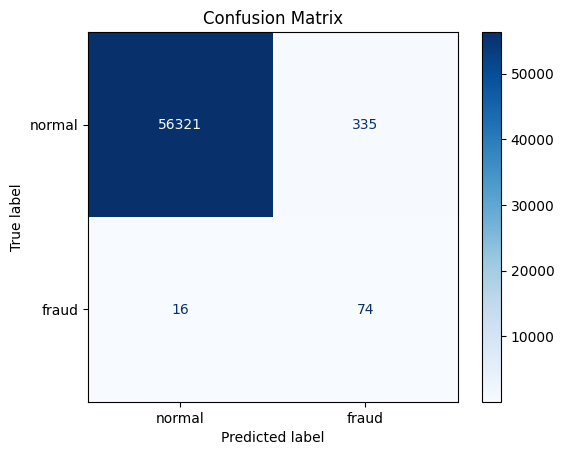

In [105]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_dnn)
display(cm)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'fraud'])
disp.plot(cmap=plt.cm.Blues)  # You can choose a color map
plt.title("Confusion Matrix")
plt.show()


In [110]:
#Train the model
model.fit(x_train.values,y_train.values, 
          validation_data=(x_val,y_val),
          epochs=10,
          batch_size=64,
          verbose=2,
          callbacks=callbacks)

Epoch 1/10
6374/6374 - 11s - 2ms/step - loss: 0.0166 - precision: 0.9929 - val_loss: 0.0133 - val_precision: 0.9949
Epoch 2/10
6374/6374 - 9s - 1ms/step - loss: 0.0156 - precision: 0.9935 - val_loss: 0.0124 - val_precision: 0.9954
Epoch 3/10
6374/6374 - 8s - 1ms/step - loss: 0.0149 - precision: 0.9937 - val_loss: 0.0119 - val_precision: 0.9954
Epoch 4/10
6374/6374 - 8s - 1ms/step - loss: 0.0137 - precision: 0.9943 - val_loss: 0.0110 - val_precision: 0.9959
Epoch 5/10
6374/6374 - 9s - 1ms/step - loss: 0.0133 - precision: 0.9946 - val_loss: 0.0103 - val_precision: 0.9967
Epoch 6/10
6374/6374 - 9s - 1ms/step - loss: 0.0127 - precision: 0.9949 - val_loss: 0.0099 - val_precision: 0.9964
Epoch 7/10
6374/6374 - 12s - 2ms/step - loss: 0.0121 - precision: 0.9951 - val_loss: 0.0095 - val_precision: 0.9970
Epoch 8/10
6374/6374 - 9s - 1ms/step - loss: 0.0114 - precision: 0.9955 - val_loss: 0.0091 - val_precision: 0.9971
Epoch 9/10
6374/6374 - 7s - 1ms/step - loss: 0.0110 - precision: 0.9956 - val_

In [111]:
y_pred_dnn = model.predict(X_test)
y_pred_dnn = (y_pred_dnn > 0.5).astype(int)
accuracy_dnn = accuracy_score(y_test, y_pred_dnn)

print('test accuracy', accuracy_dnn)
print('classification report:\n',classification_report(y_test, y_pred_dnn) )


1774/1774 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
test accuracy 0.9965988792161562
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.29      0.82      0.43        90

    accuracy                           1.00     56746
   macro avg       0.65      0.91      0.72     56746
weighted avg       1.00      1.00      1.00     56746



array([[56479,   177],
       [   16,    74]], dtype=int64)

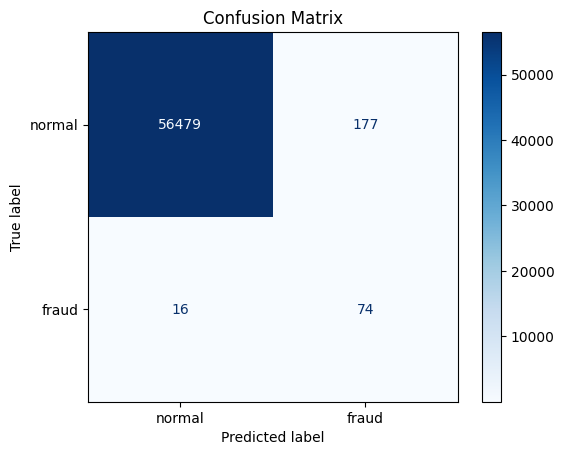

In [112]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_dnn)
display(cm)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'fraud'])
disp.plot(cmap=plt.cm.Blues)  # You can choose a color map
plt.title("Confusion Matrix")
plt.show()


In [120]:
#Train the model
model.fit(x_train.values,y_train.values, 
          validation_data=(x_val,y_val),
          epochs=10,
          batch_size=64,
          verbose=2,
          callbacks=callbacks)

Epoch 1/10
6374/6374 - 13s - 2ms/step - loss: 0.0964 - recall: 0.9528 - val_loss: 0.0396 - val_recall: 0.9895
Epoch 2/10
6374/6374 - 8s - 1ms/step - loss: 0.0358 - recall: 0.9900 - val_loss: 0.0202 - val_recall: 0.9996
Epoch 3/10
6374/6374 - 9s - 1ms/step - loss: 0.0232 - recall: 0.9969 - val_loss: 0.0149 - val_recall: 1.0000
Epoch 4/10
6374/6374 - 13s - 2ms/step - loss: 0.0169 - recall: 0.9984 - val_loss: 0.0111 - val_recall: 1.0000
Epoch 5/10
6374/6374 - 10s - 2ms/step - loss: 0.0138 - recall: 0.9989 - val_loss: 0.0097 - val_recall: 1.0000
Epoch 6/10

Reached 99.9% recall so cancelling training!
6374/6374 - 11s - 2ms/step - loss: 0.0114 - recall: 0.9992 - val_loss: 0.0082 - val_recall: 1.0000


In [142]:
y_pred_dnns = model.predict(X_test)
y_pred_dnn = (y_pred_dnns > 0.98).astype(int)
accuracy_dnn = accuracy_score(y_test, y_pred_dnn)

print('test accuracy', accuracy_dnn)
print('classification report:\n',classification_report(y_test, y_pred_dnn) )


1774/1774 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
test accuracy 0.999048391076023
classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.66      0.82      0.73        90

    accuracy                           1.00     56746
   macro avg       0.83      0.91      0.87     56746
weighted avg       1.00      1.00      1.00     56746



array([[56618,    38],
       [   16,    74]], dtype=int64)

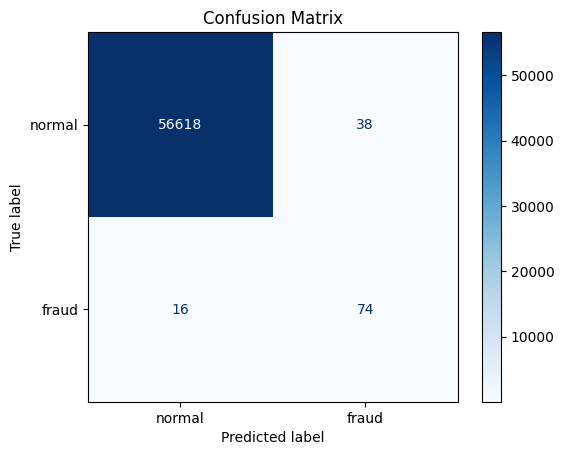

In [143]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_dnn)
display(cm)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'fraud'])
disp.plot(cmap=plt.cm.Blues)  # You can choose a color map
plt.title("Confusion Matrix")
plt.show()


In [137]:
pred = y_pred_dnns[y_pred_dnns > 0.9]
len(pred)
pred

array([0.9459861 , 1.        , 1.        , 0.99376583, 0.9630615 ,
       0.9725472 , 0.9999985 , 1.        , 1.        , 0.9963391 ,
       1.        , 1.        , 0.9457023 , 1.        , 0.9228295 ,
       1.        , 0.9999679 , 1.        , 1.        , 0.97993904,
       1.        , 0.999999  , 0.93634707, 0.96779716, 0.9999992 ,
       1.        , 1.        , 0.9108689 , 0.99418265, 1.        ,
       0.9197681 , 0.9418423 , 0.98874825, 0.99999934, 0.9997068 ,
       0.9990038 , 1.        , 0.98917043, 1.        , 0.9986574 ,
       0.99999994, 0.9999791 , 1.        , 1.        , 0.9999319 ,
       1.        , 0.99990225, 1.        , 1.        , 0.9999979 ,
       0.9690806 , 1.        , 0.9997974 , 1.        , 0.9356664 ,
       1.        , 0.9887865 , 0.9999995 , 0.99968565, 1.        ,
       0.98911667, 0.99952346, 0.99888206, 0.92629844, 0.95407826,
       0.9721844 , 0.9999999 , 0.9999995 , 0.9999984 , 1.        ,
       1.        , 0.9283948 , 0.9999755 , 1.        , 0.99999

### CNN

In [146]:
# import the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv1D,BatchNormalization,Dropout
import numpy as np

In [166]:
X_test.shape

(56746, 30, 1)

In [167]:
X_train.shape

(407874, 30, 1)

In [ ]:
# Convert to NumPy arrays and reshape
X_train = x_train.to_numpy().reshape(x_train.shape[0], x_train.shape[1], 1)
X_val = x_val.to_numpy().reshape(x_val.shape[0], x_val.shape[1], 1)
X_test = X_test.to_numpy().reshape(X_test.shape[0], X_test.shape[1], 1)
# check the shape again
X_train.shape, X_val.shape, X_test.shape

In [149]:
# import model
model=Sequential()
# layers
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# build ANN
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='relu'))

In [150]:
# summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 29, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 29, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 29, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 28, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │       114,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,457 (466.63 KB)

 Trainable params: 119,265 (465.88 KB)

 Non-trainable params: 192 (768.00 B)

In [151]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [157]:
%%time
# fitting the model
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_val), verbose=2) # callbacks=callbacks

Epoch 1/10


In [158]:
# plot
def plot_learningcurve(history,epochs):
  epoch=range(1,epochs+1)
  # accuracy
  plt.plot(epoch, history.history['accuracy'])
  plt.plot(epoch, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

  # loss
  plt.plot(epoch, history.history['loss'])
  plt.plot(epoch, history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

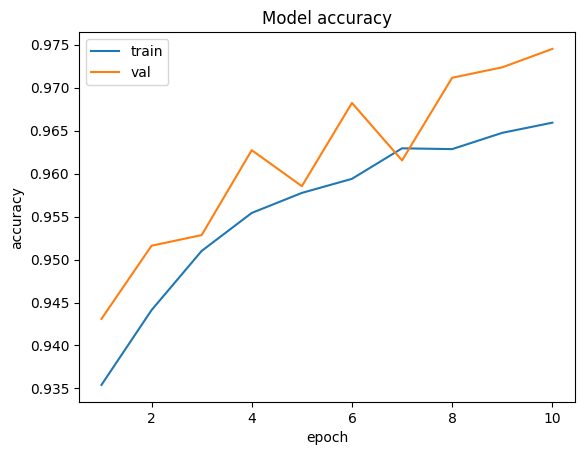

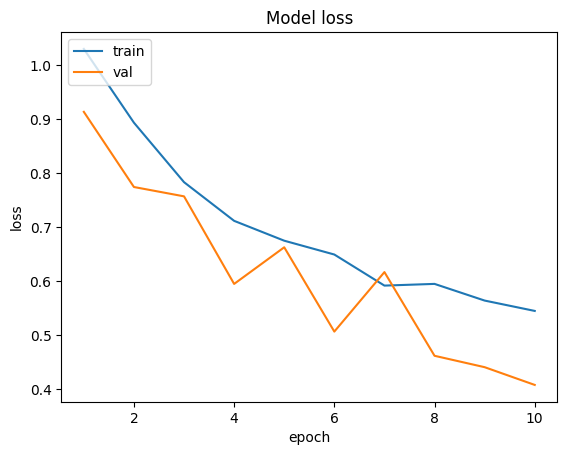

In [159]:
plot_learningcurve(history,10)

In [174]:
y_pred_cnn = model.predict(X_test)
y_pred_cnn = (y_pred_cnn > 0.95).astype(int)
accuracy_cnn = accuracy_score(y_test, y_pred_dnn)

print('test accuracy', accuracy_cnn)
print('classification report:\n',classification_report(y_test, y_pred_cnn) )


1774/1774 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
test accuracy 0.999048391076023
classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.06      0.88      0.12        90

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.55     56746
weighted avg       1.00      0.98      0.99     56746



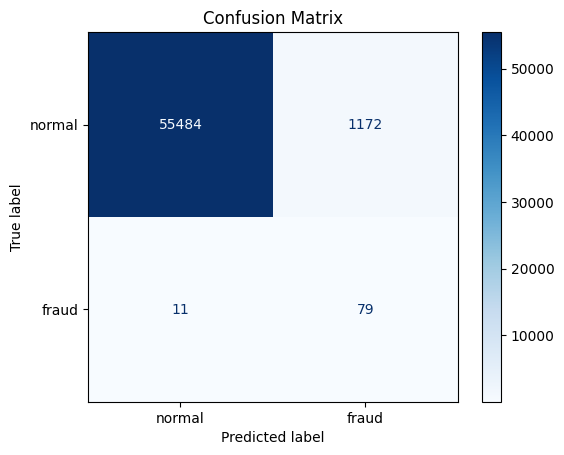

array([[55484,  1172],
       [   11,    79]], dtype=int64)

In [171]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_cnn)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['normal', 'fraud'])
disp.plot(cmap=plt.cm.Blues)  # You can choose a color map
plt.title("Confusion Matrix")
plt.show()

cm

## MLFLOW

In [175]:
# Import necessary libraries
import mlflow
import mlflow.sklearn

In [176]:
# Enable autologging
mlflow.sklearn.autolog()

In [179]:
with mlflow.start_run():
    # Model training
    # Create and fit the linear regression model
    linear_model = LinearRegression()
    linear_model.fit(X_train_resample, y_train_resample)

    y_pred = linear_model.predict(X_test)
    y_pred = (y_pred > 0.95).astype(int)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")

    # Log parameters and metrics manually (optional)
    mlflow.log_metric("accuracy", accuracy)

    # Log the model to MLflow
    mlflow.sklearn.log_model(linear_model, "logistic_regression_model")
        # Log parameters
    mlflow.log_param("max_iter", 100)
    mlflow.log_param("solver", "lbfgs")


    # Optionally save artifacts (like plots)
    # Example: save confusion matrix, ROC curve, etc.
    
    # Print the run ID for reference
    run_id = mlflow.active_run().info.run_id
    print(f"Run ID: {run_id}")

Accuracy: 0.9982377612518945


2024/10/23 12:51:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Run ID: ef90ab304d1b4bd4865b95d32eb48874


In [ ]:
models = [
    (
        "Logistic Regression", 
        linear_model(), 
        (X_train_resample, y_train_resample),
        (X_test, y_test)
    ),
    (
        "Random Forest", 
        RandomForestClassifier(), 
        (X_train_resample, y_train_resample),
        (X_test, y_test)
    ),
    (
        "Decision Tree",
        DecisionTreeClassifier(random_state=42), 
        (X_train_resample, y_train_resample),
        (X_test, y_test)
    )
]